# Computing Square Adapted Wasserstein Distance 2 with Fitted Value Iteration

This notebook demonstrates how to compute the squared adapted Wasserstein distance using Fitted Value Iteration (FVI). The method leverages conditional density estimation, as described in the paper:

**"Learning conditional distributions on continuous spaces"**  
Cyril Bénézet, Ziteng Cheng, and Sebastian Jaimungal (2024).  
[arXiv:2406.09375](https://arxiv.org/abs/2406.09375)

We utilize a neural network-based approach to estimate conditional densities and train a deep Q-network (DQN) to approximate the adapted optimal transport distance. The codebase integrates various modules for sampling paths, building adapted trees, and solving the transport problem efficiently.

In this notebook, we will:
1. Generate sample paths from Brownian motion.
2. Estimate conditional densities.
3. Train the FVI algorithm to approximate the adapted Wasserstein distance.
4. Compute and compare the real adapted Wasserstein distance as a benchmarking value.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
import os

# Define paths to relevant modules
measure_sampling_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Measure_sampling')
CD_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Conditional_density')
FVI_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI')
Benchmark_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Benchmark_value_Gausian')

# Add paths to sys.path
for path in [measure_sampling_path, CD_path, FVI_path, Benchmark_path]:
    if path not in sys.path:
        sys.path.append(path)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Import necessary modules
from Gen_Path_and_AdaptedTrees import generate_brownian_motion
from CD_knn_NerualNet import train_conditional_density
from IPython.display import display, clear_output
from FVI import train_dqn_instance, train_dqn_instance_nonparam
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared

In [2]:
# Generate Brownian motion paths
n_data = 2000
time_steps = 5  # For example, t=0, t=1, t=2, t=3

scale_x = 1
scale_y = 0.5
x_init = 1
y_init = 2

In [3]:
# Define parameters
a, b = x_init, y_init
var_a, var_b = scale_x**2, scale_y**2
t = time_steps-1

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 6.5000
Adapted Wasserstein Distance: 2.5495


-----------------------------------------------
Run: 0.0000


/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/utils.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_batch = torch.stack([torch.tensor(t, dtype=torch.float32) for t in batch.time])


Time step 4 Loss: 0.0002649614025176561
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.66 seconds.
Number of NaN losses encountered: 0


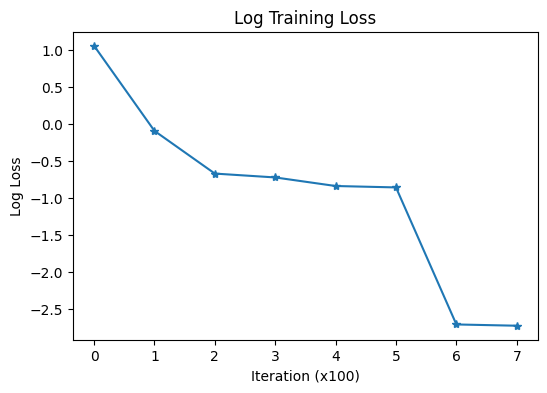

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.28 seconds.
Number of NaN losses encountered: 0


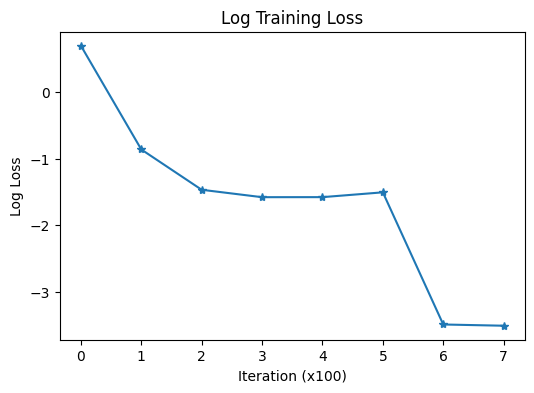

/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_x = torch.tensor(x_est, dtype=torch.float32).reshape(-1, 1)
/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_y = torch.tensor(y_est, dtype=torch.float32).reshape(-1, 1)


Time step 3 Loss: 3.768981318473816
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.01 seconds.
Number of NaN losses encountered: 0


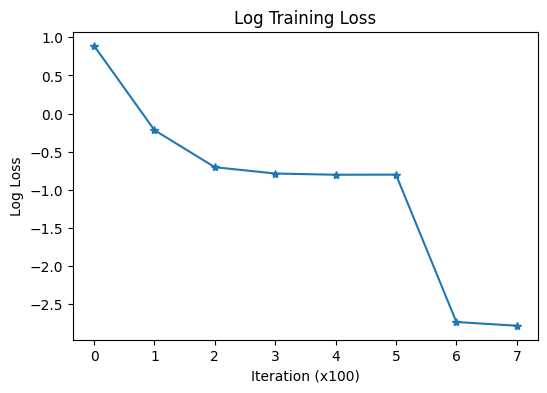

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 39.77 seconds.
Number of NaN losses encountered: 0


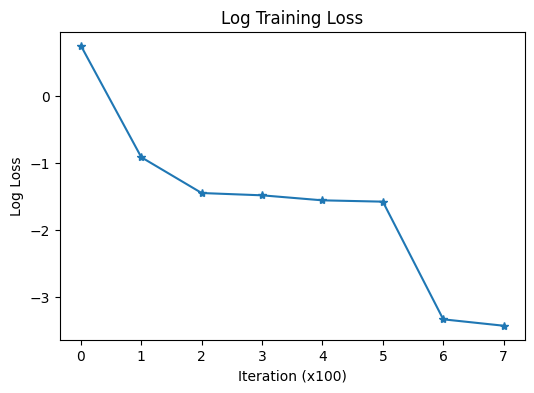

Time step 2 Loss: 1.5191818130016328
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.64 seconds.
Number of NaN losses encountered: 0


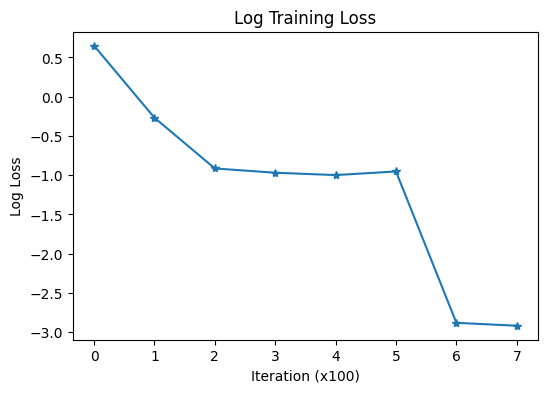

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.84 seconds.
Number of NaN losses encountered: 0


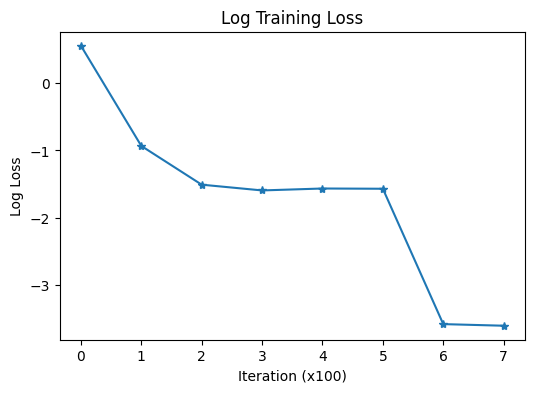

Time step 1 Loss: 0.49753916829824446
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.45 seconds.
Number of NaN losses encountered: 0


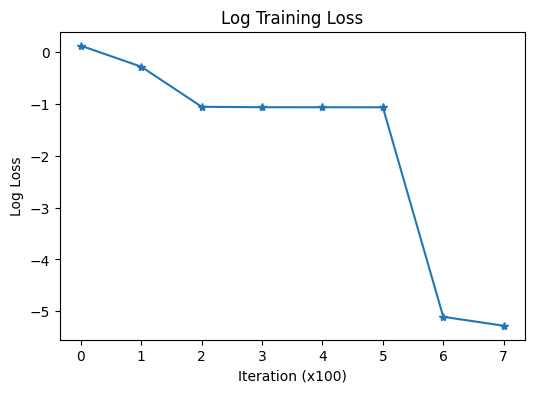

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.22 seconds.
Number of NaN losses encountered: 0


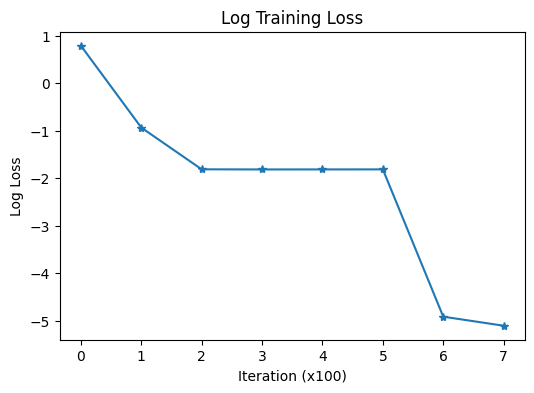

Time step 0 Loss: 0.023675818165575038
Final value at time 0: 8.09512710571289
-----------------------------------------------
Run: 1.0000
Time step 4 Loss: 7.647136151973655e-06
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.16 seconds.
Number of NaN losses encountered: 0


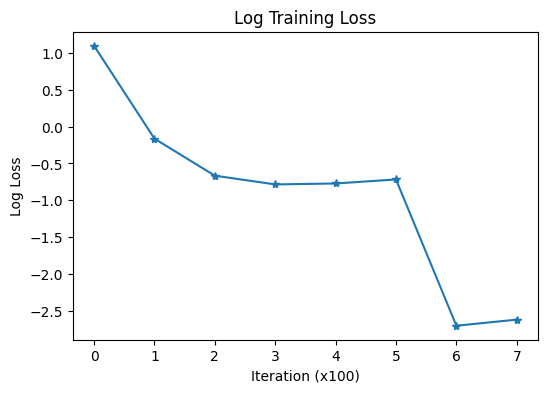

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.55 seconds.
Number of NaN losses encountered: 0


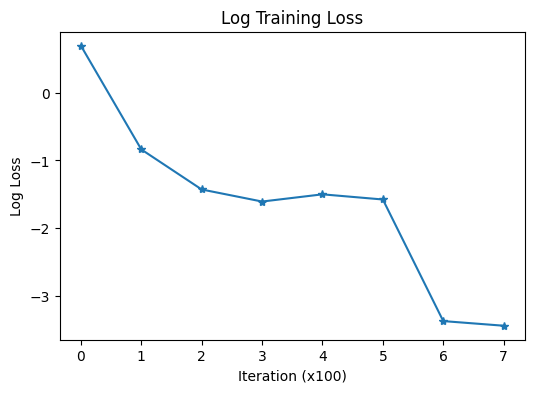

Time step 3 Loss: 3.15116925239563
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 39.52 seconds.
Number of NaN losses encountered: 0


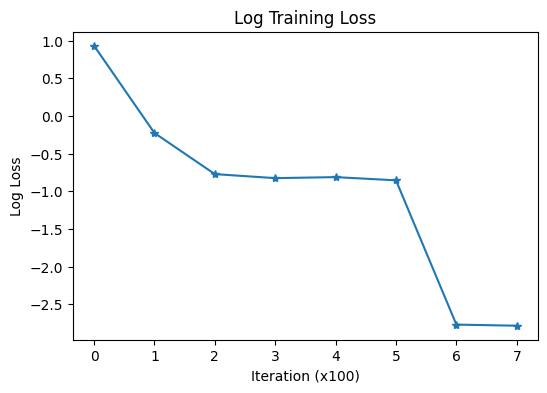

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.76 seconds.
Number of NaN losses encountered: 0


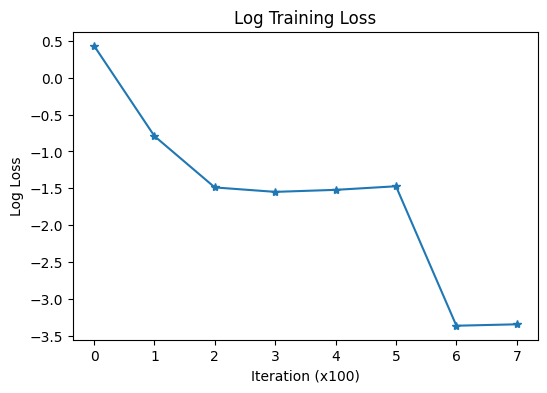

Time step 2 Loss: 1.1951728653907776
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.85 seconds.
Number of NaN losses encountered: 0


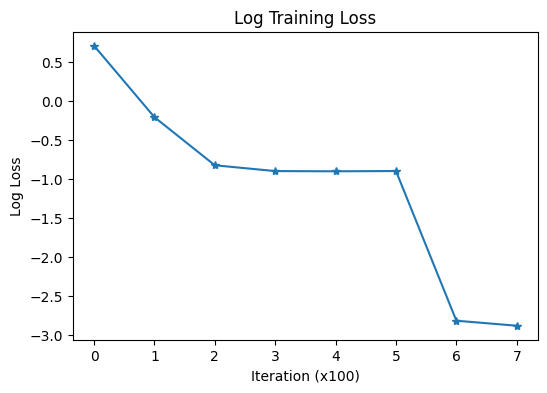

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.27 seconds.
Number of NaN losses encountered: 0


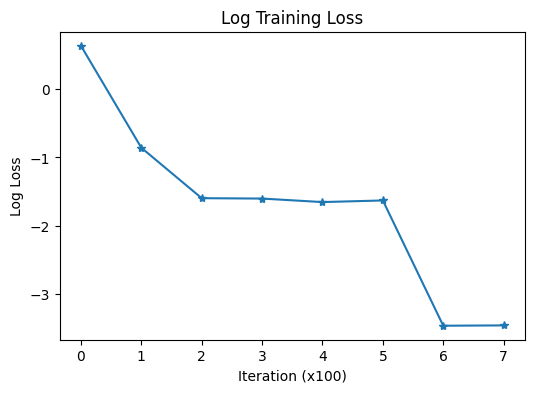

Time step 1 Loss: 0.5577687665820121
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.69 seconds.
Number of NaN losses encountered: 0


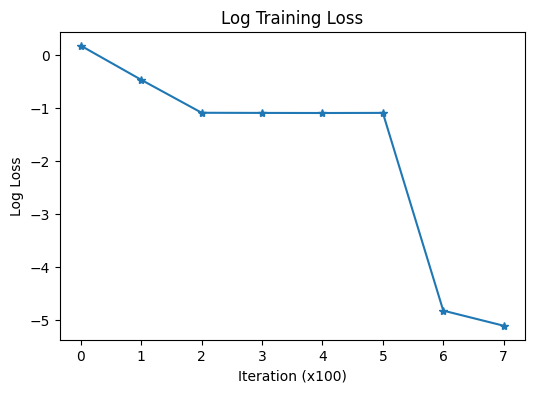

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.95 seconds.
Number of NaN losses encountered: 0


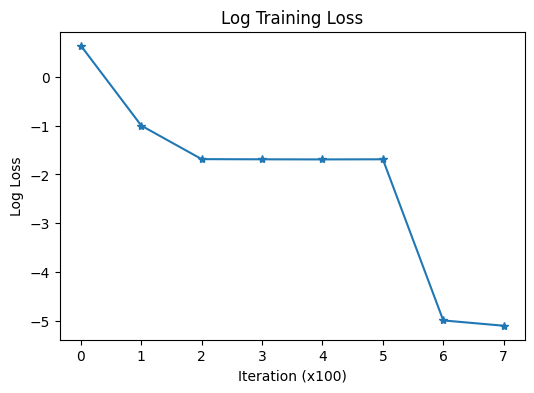

Time step 0 Loss: 0.1419980054114805
Final value at time 0: 6.371284008026123
-----------------------------------------------
Run: 2.0000
Time step 4 Loss: 5.407178722634853e-05
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.94 seconds.
Number of NaN losses encountered: 0


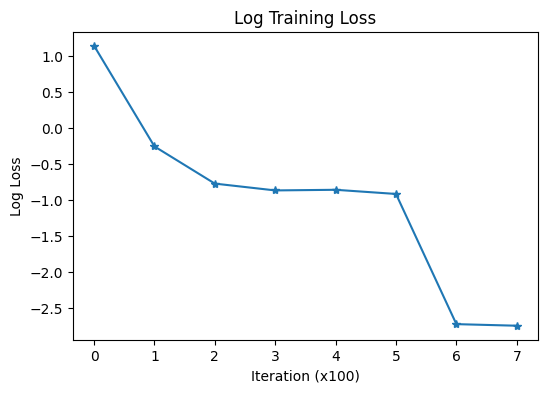

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.41 seconds.
Number of NaN losses encountered: 0


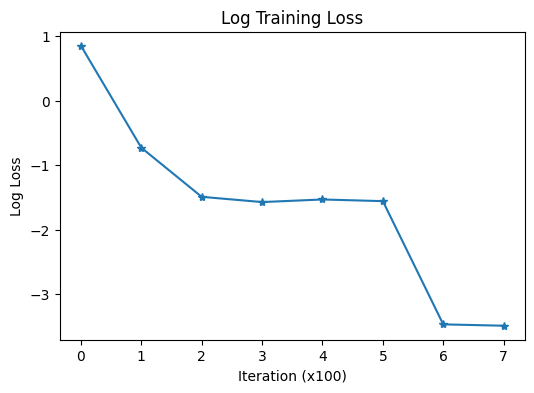

Time step 3 Loss: 3.296514005661011
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.67 seconds.
Number of NaN losses encountered: 0


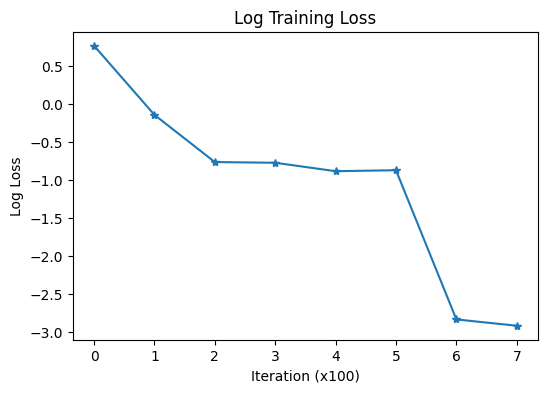

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.73 seconds.
Number of NaN losses encountered: 0


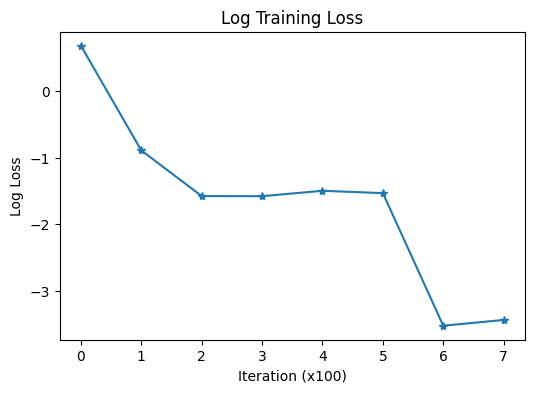

Time step 2 Loss: 1.5069985949993134
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.56 seconds.
Number of NaN losses encountered: 0


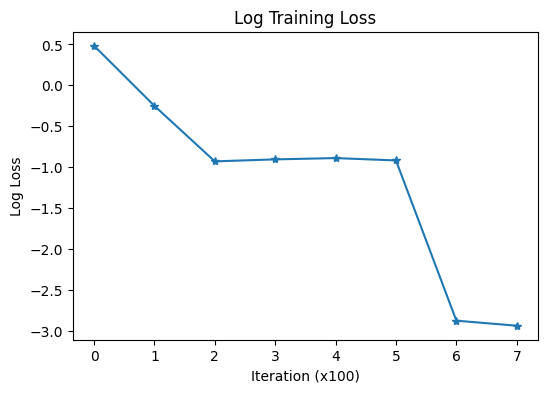

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.59 seconds.
Number of NaN losses encountered: 0


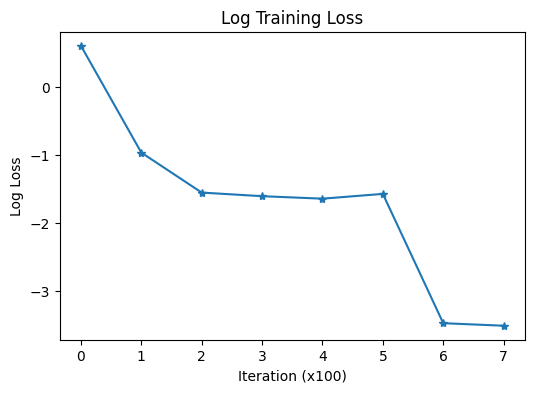

Time step 1 Loss: 0.5808189183473587
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 33.11 seconds.
Number of NaN losses encountered: 0


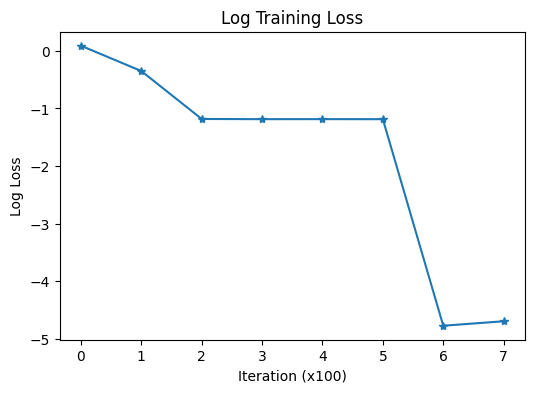

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 46.18 seconds.
Number of NaN losses encountered: 0


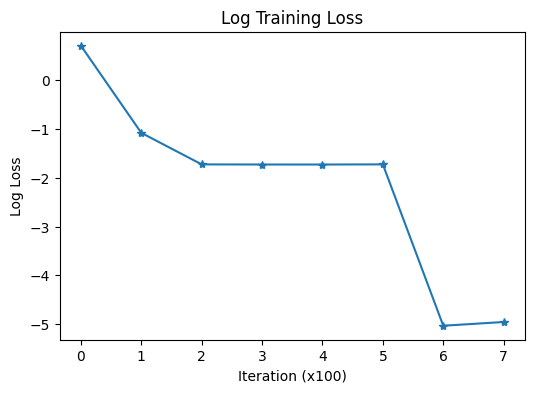

Time step 0 Loss: 0.009590035670553334
Final value at time 0: 7.4547882080078125
-----------------------------------------------
Run: 3.0000
Time step 4 Loss: 0.009268131316057407
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.59 seconds.
Number of NaN losses encountered: 0


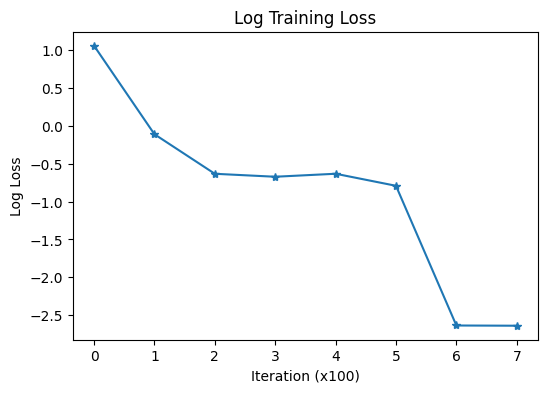

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.35 seconds.
Number of NaN losses encountered: 0


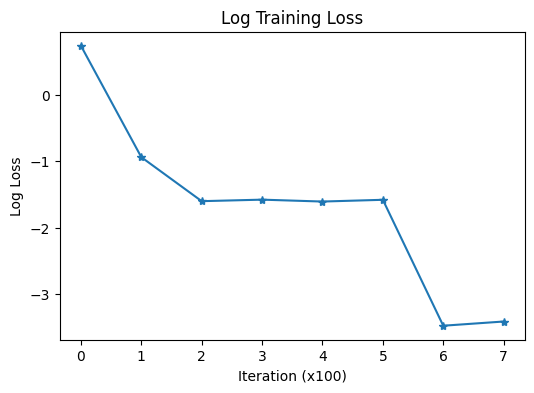

Time step 3 Loss: 3.5021320295333864
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.56 seconds.
Number of NaN losses encountered: 0


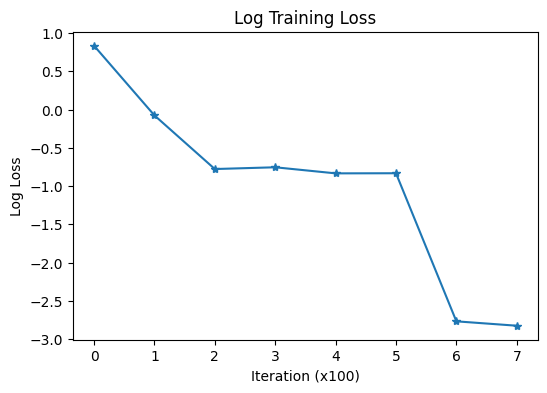

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.64 seconds.
Number of NaN losses encountered: 0


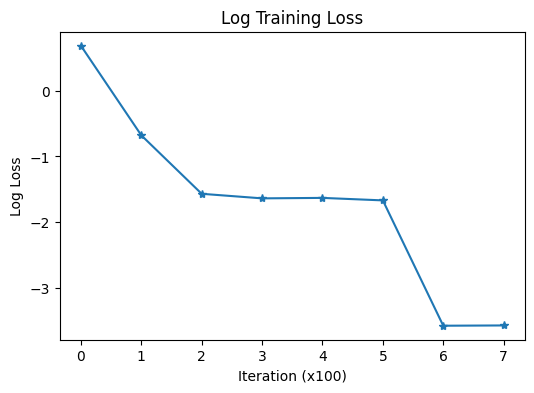

Time step 2 Loss: 1.935001254081726
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.66 seconds.
Number of NaN losses encountered: 0


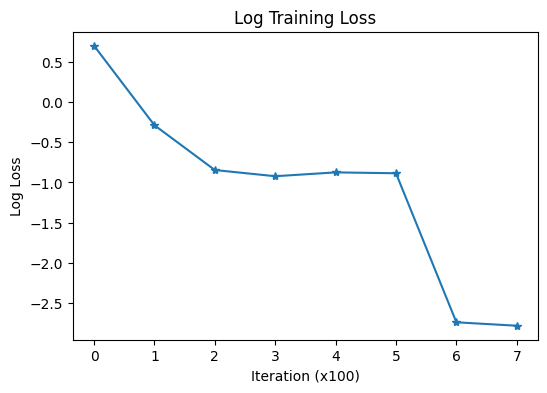

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.58 seconds.
Number of NaN losses encountered: 0


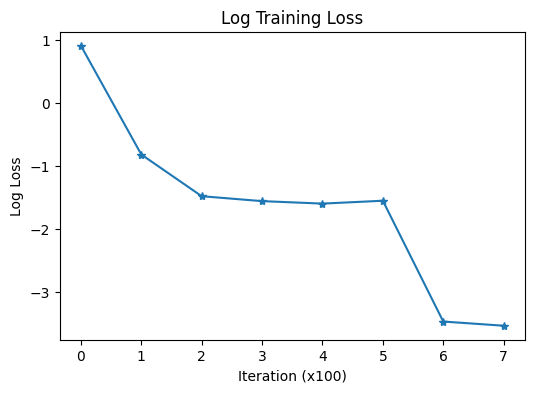

Time step 1 Loss: 0.528873203098774
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 33.43 seconds.
Number of NaN losses encountered: 0


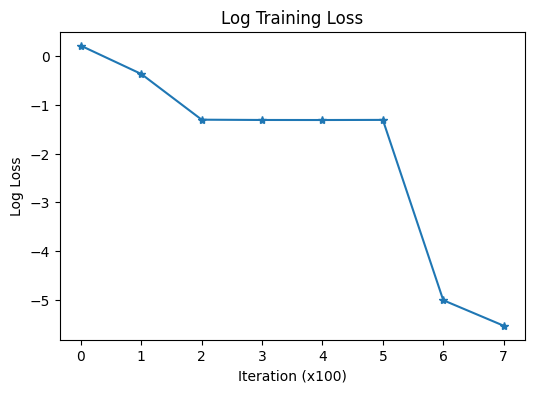

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 33.30 seconds.
Number of NaN losses encountered: 0


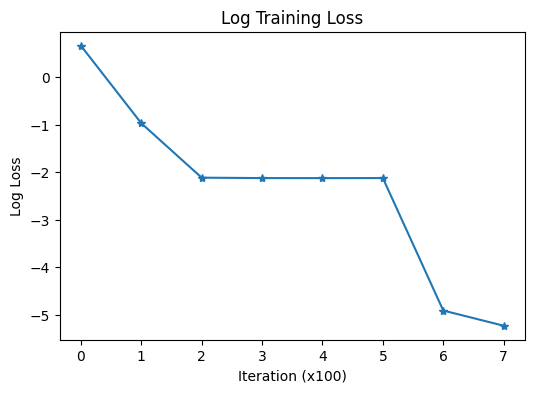

Time step 0 Loss: 0.046720192585362384
Final value at time 0: 6.250522136688232
-----------------------------------------------
Run: 4.0000
Time step 4 Loss: 0.0028615377007372446
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 43.34 seconds.
Number of NaN losses encountered: 0


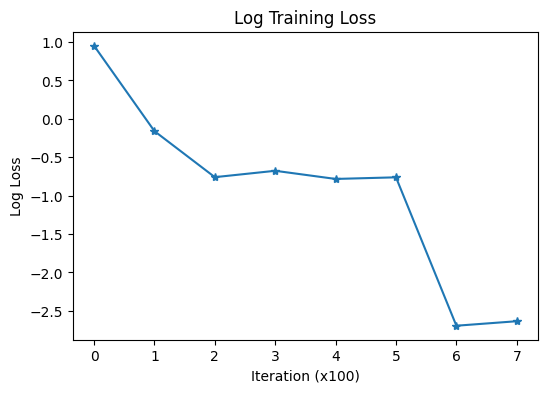

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.94 seconds.
Number of NaN losses encountered: 0


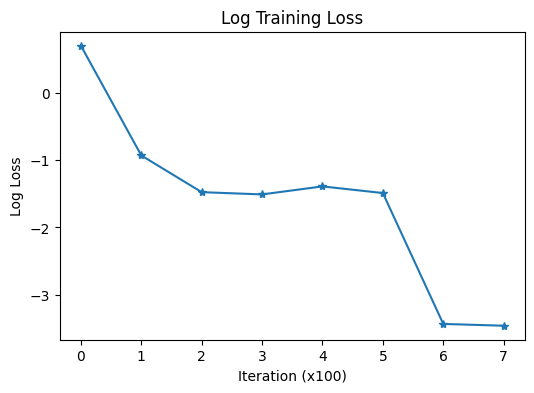

Time step 3 Loss: 3.3793582630157473
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.95 seconds.
Number of NaN losses encountered: 0


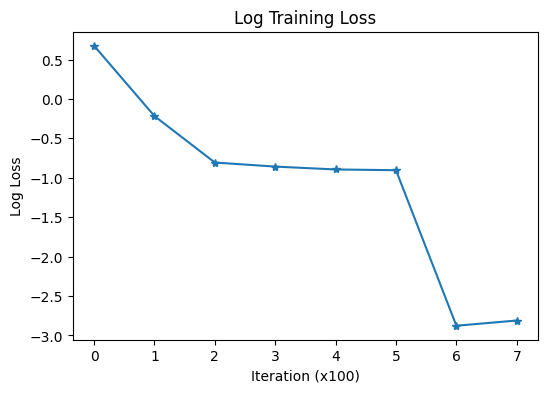

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.87 seconds.
Number of NaN losses encountered: 0


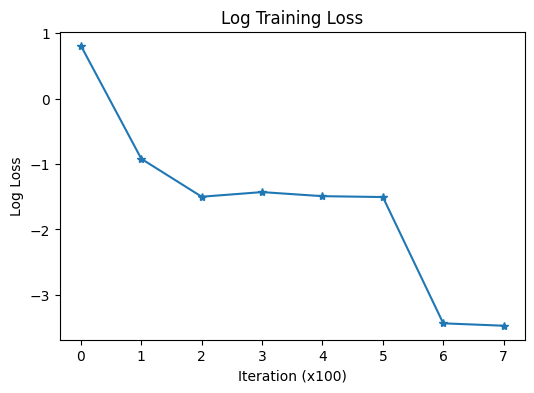

Time step 2 Loss: 2.1389064741134645
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.94 seconds.
Number of NaN losses encountered: 0


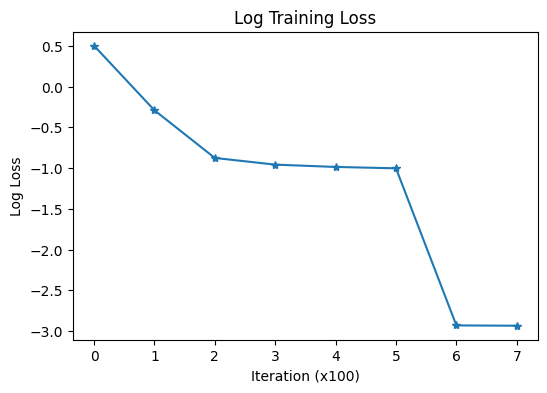

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.05 seconds.
Number of NaN losses encountered: 0


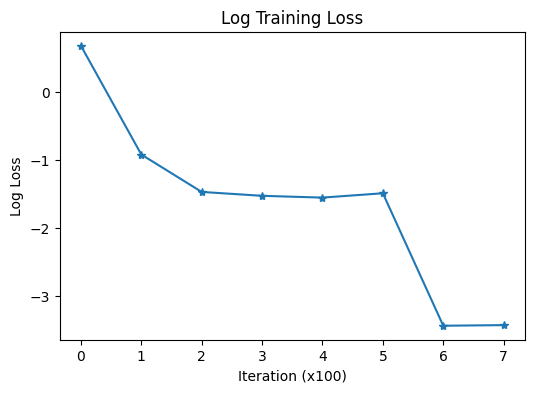

Time step 1 Loss: 0.6738810922205448
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.05 seconds.
Number of NaN losses encountered: 0


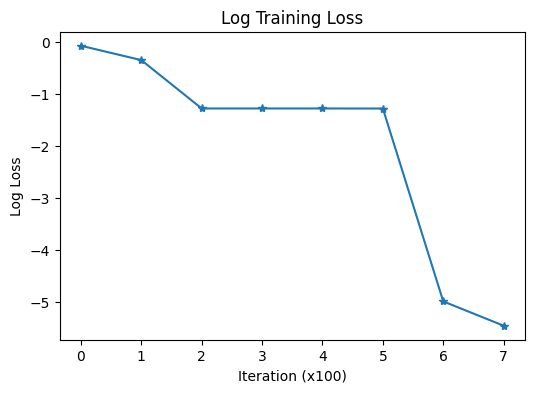

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.01 seconds.
Number of NaN losses encountered: 0


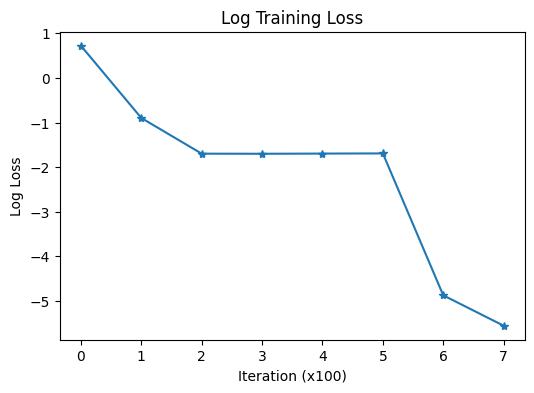

Time step 0 Loss: 0.007336041285898318
Final value at time 0: 7.834312915802002
-----------------------------------------------
Run: 5.0000
Time step 4 Loss: 8.528506813490822e-05
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.17 seconds.
Number of NaN losses encountered: 0


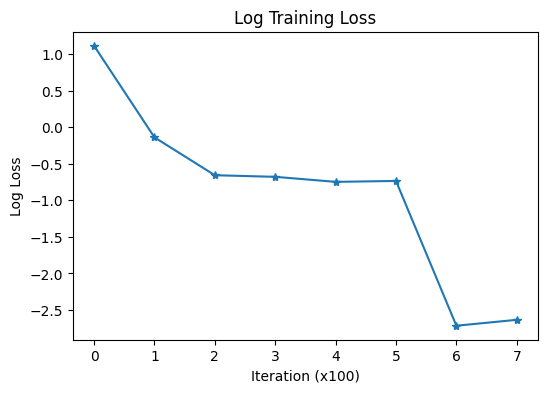

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.02 seconds.
Number of NaN losses encountered: 0


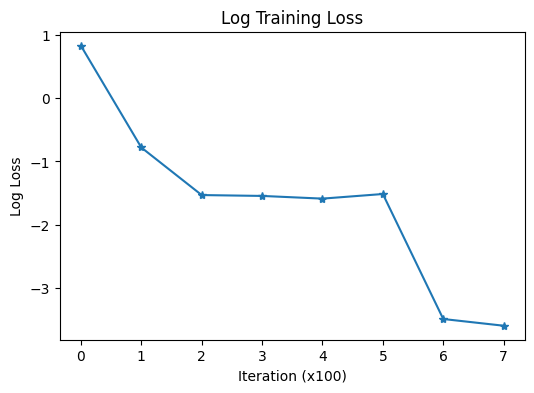

Time step 3 Loss: 3.5677608585357667
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.83 seconds.
Number of NaN losses encountered: 0


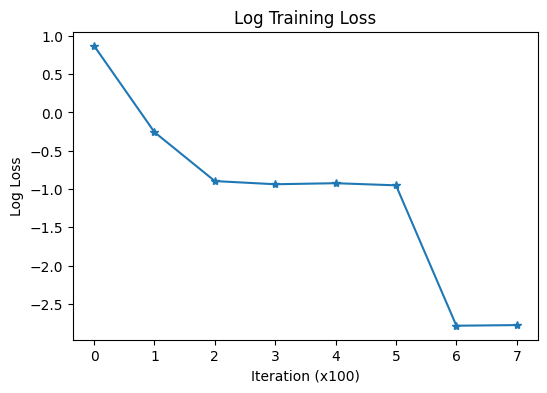

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.98 seconds.
Number of NaN losses encountered: 0


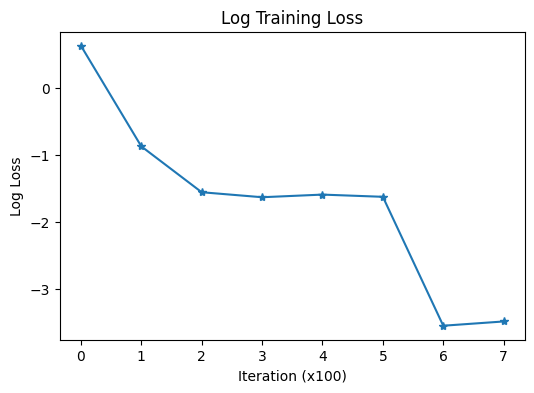

Time step 2 Loss: 2.122247779369354
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.71 seconds.
Number of NaN losses encountered: 0


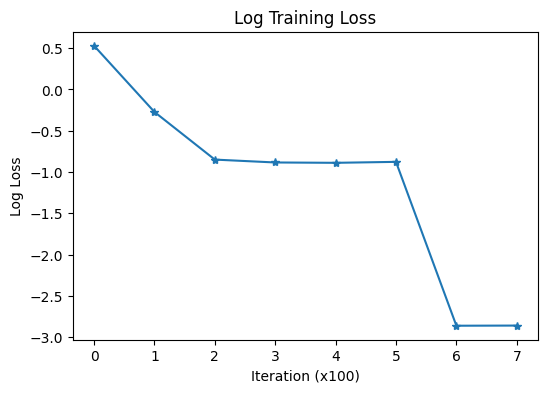

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.48 seconds.
Number of NaN losses encountered: 0


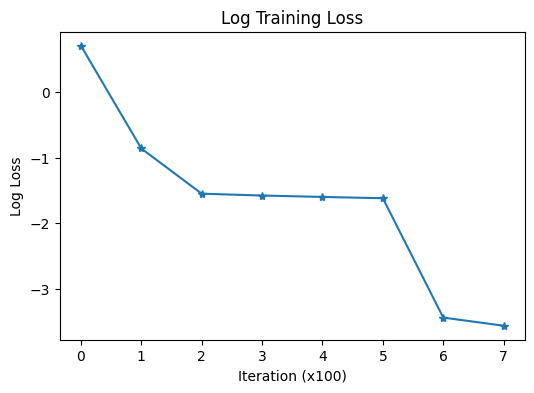

Time step 1 Loss: 0.3904429605603218
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.70 seconds.
Number of NaN losses encountered: 0


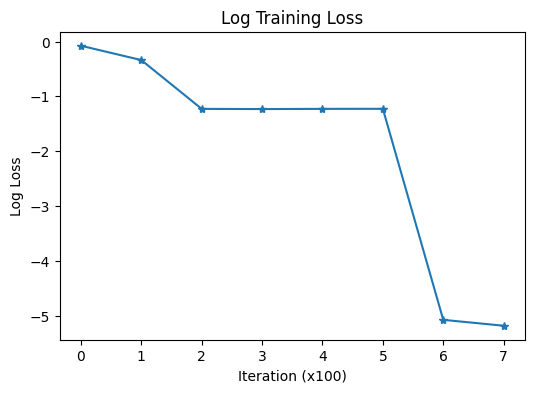

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.61 seconds.
Number of NaN losses encountered: 0


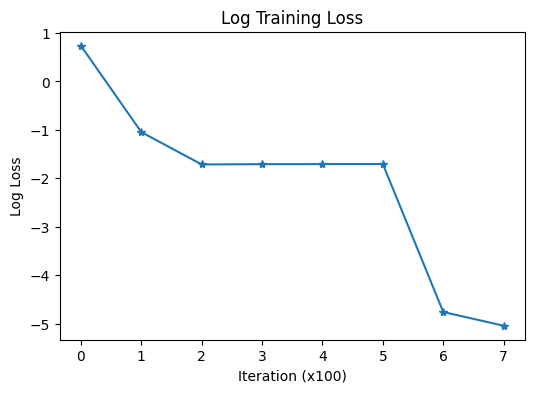

Time step 0 Loss: 0.15588916314169182
Final value at time 0: 8.77834701538086
-----------------------------------------------
Run: 6.0000
Time step 4 Loss: 0.011074062513071112
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 61.53 seconds.
Number of NaN losses encountered: 0


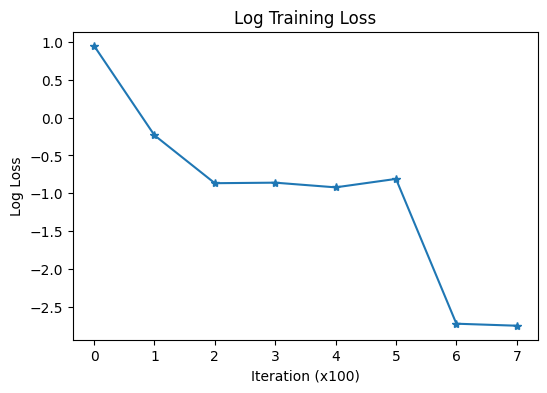

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.07 seconds.
Number of NaN losses encountered: 0


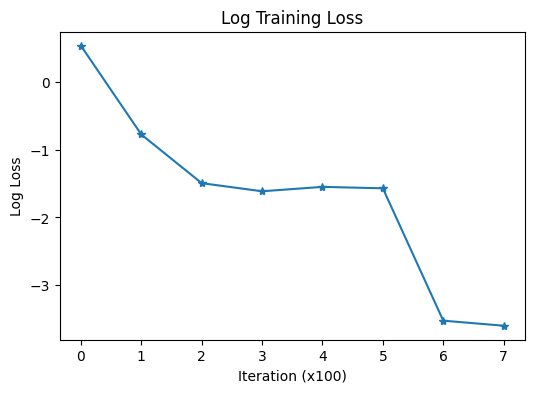

Time step 3 Loss: 3.465999331474304
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.17 seconds.
Number of NaN losses encountered: 0


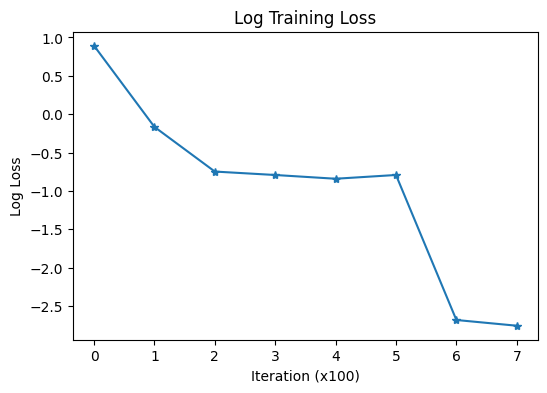

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.04 seconds.
Number of NaN losses encountered: 0


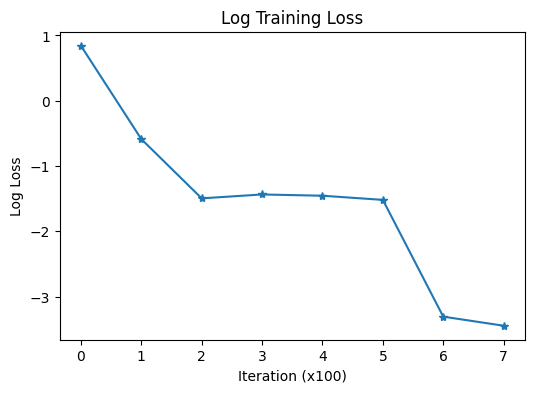

Time step 2 Loss: 2.437325975894928
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.01 seconds.
Number of NaN losses encountered: 0


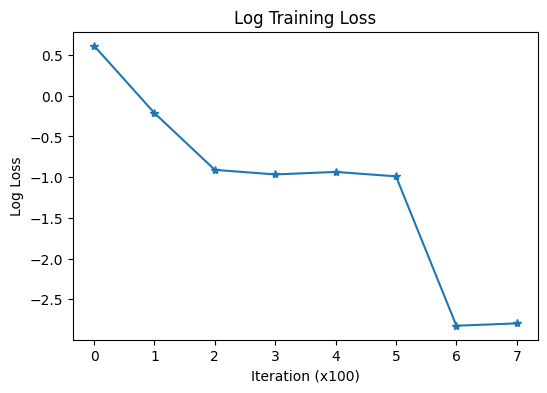

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.17 seconds.
Number of NaN losses encountered: 0


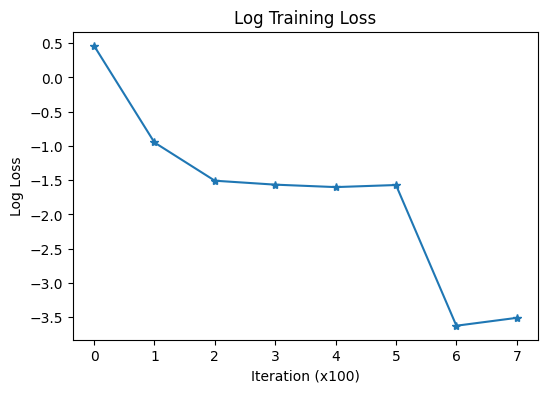

Time step 1 Loss: 1.0440231835842133
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.82 seconds.
Number of NaN losses encountered: 0


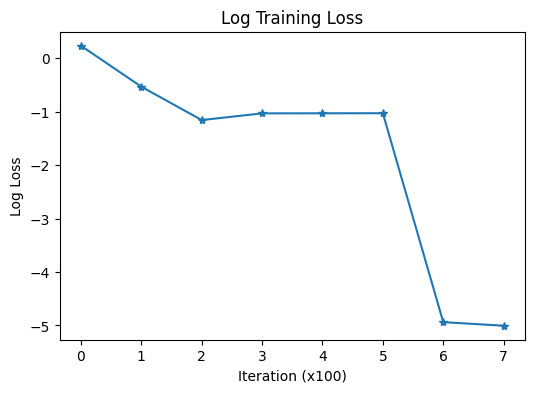

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.84 seconds.
Number of NaN losses encountered: 0


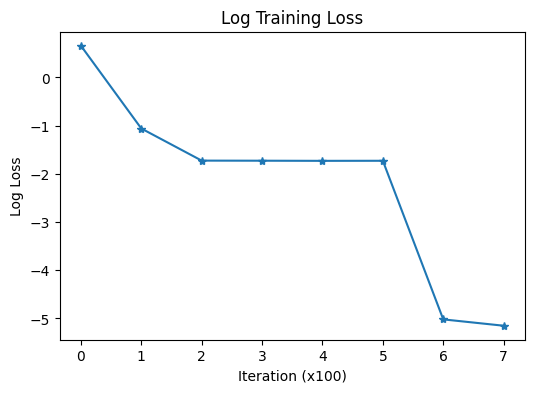

Time step 0 Loss: 0.17516504627259566
Final value at time 0: 5.874748229980469
-----------------------------------------------
Run: 7.0000
Time step 4 Loss: 0.0555641138314968
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.44 seconds.
Number of NaN losses encountered: 0


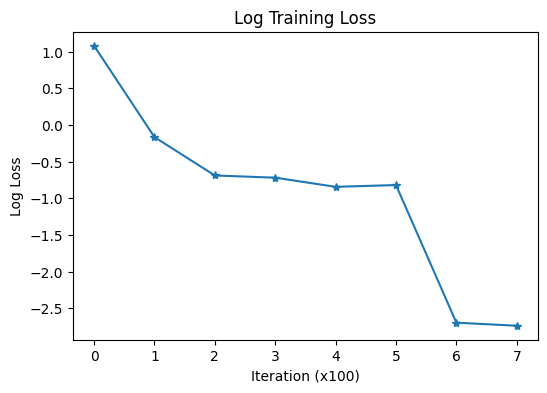

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.09 seconds.
Number of NaN losses encountered: 0


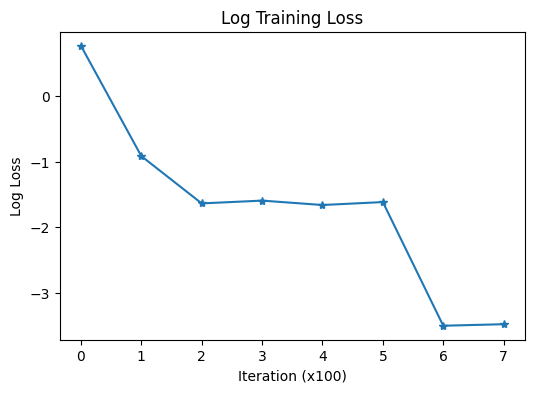

Time step 3 Loss: 3.88693297624588
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.31 seconds.
Number of NaN losses encountered: 0


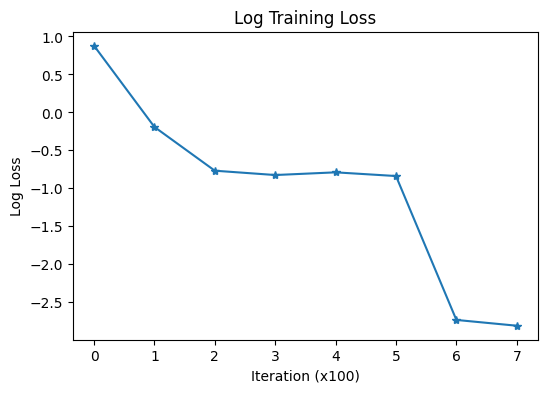

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.71 seconds.
Number of NaN losses encountered: 0


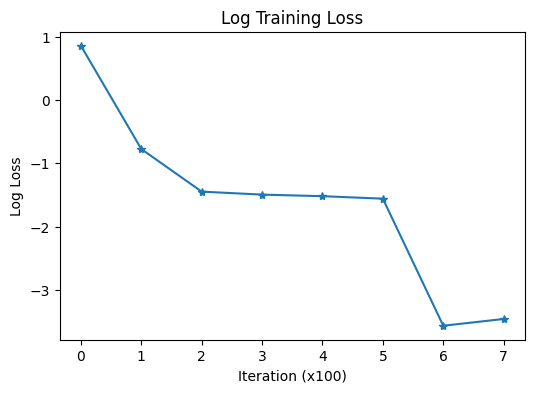

Time step 2 Loss: 1.9579417896270752
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.18 seconds.
Number of NaN losses encountered: 0


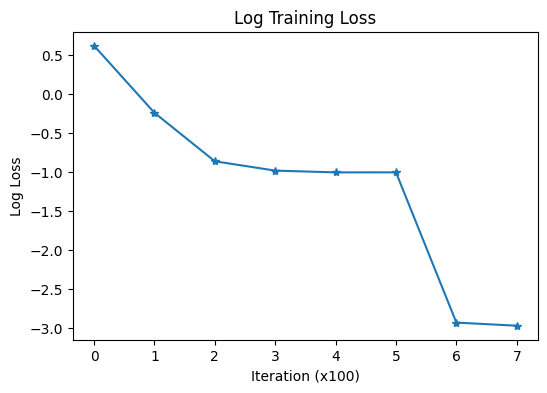

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.28 seconds.
Number of NaN losses encountered: 0


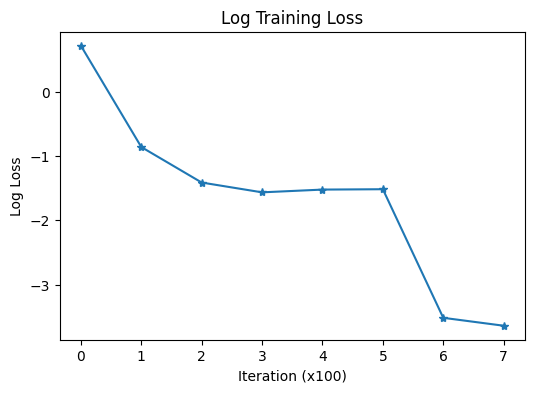

Time step 1 Loss: 0.5809213536977768
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.81 seconds.
Number of NaN losses encountered: 0


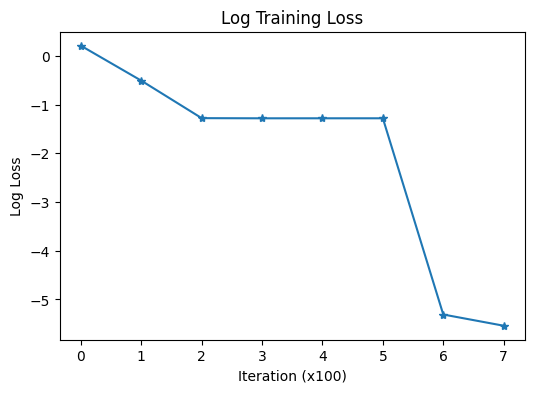

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.94 seconds.
Number of NaN losses encountered: 0


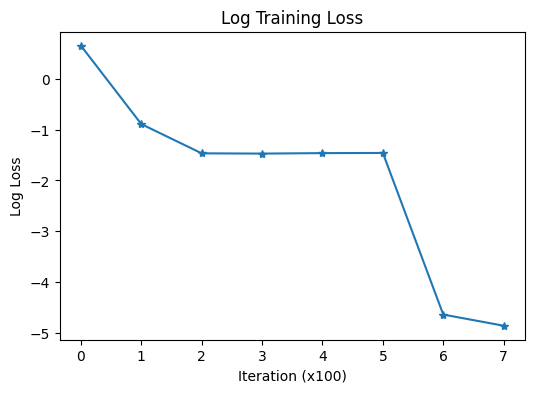

Time step 0 Loss: 0.11987408383007278
Final value at time 0: 6.422167778015137
-----------------------------------------------
Run: 8.0000
Time step 4 Loss: 0.0026122446055342153
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 65.72 seconds.
Number of NaN losses encountered: 0


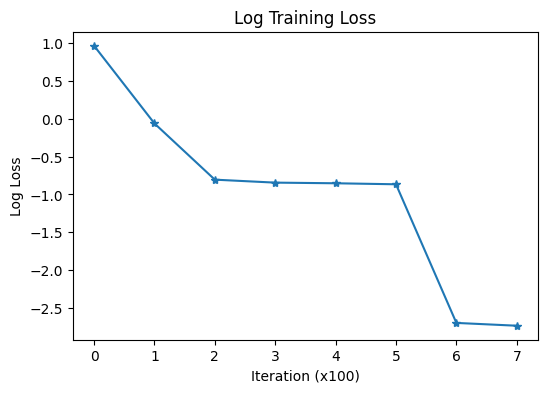

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 2914.92 seconds.
Number of NaN losses encountered: 0


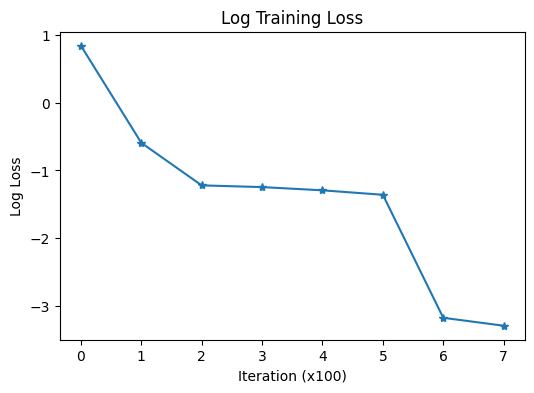

Time step 3 Loss: 3.3094460105895998
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 997.75 seconds.
Number of NaN losses encountered: 0


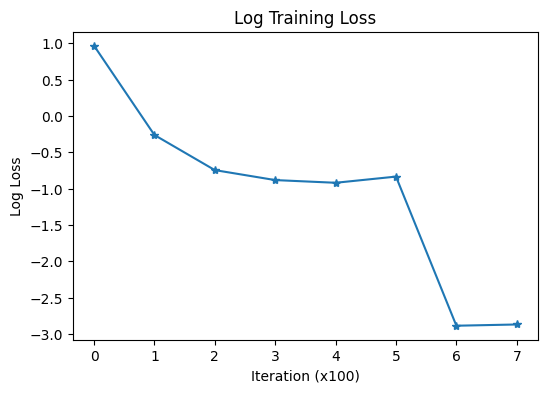

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1125.18 seconds.
Number of NaN losses encountered: 0


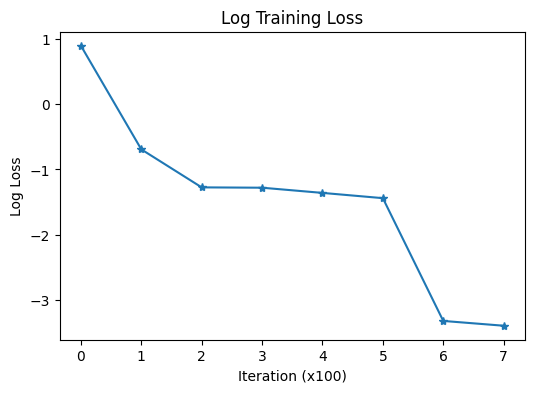

Time step 2 Loss: 1.559655590057373
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 823.35 seconds.
Number of NaN losses encountered: 0


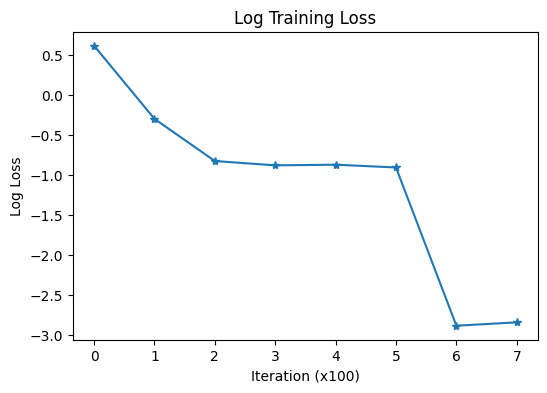

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 120.35 seconds.
Number of NaN losses encountered: 0


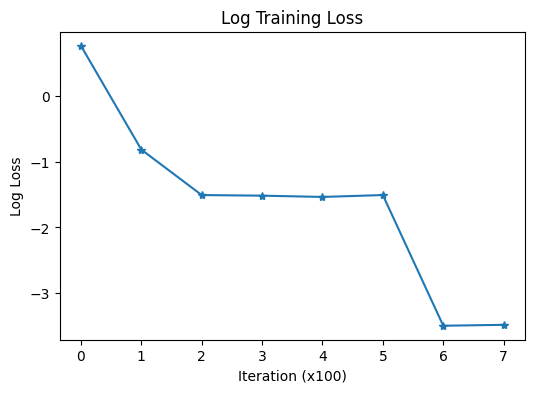

Time step 1 Loss: 0.6348118099570275
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 73.78 seconds.
Number of NaN losses encountered: 0


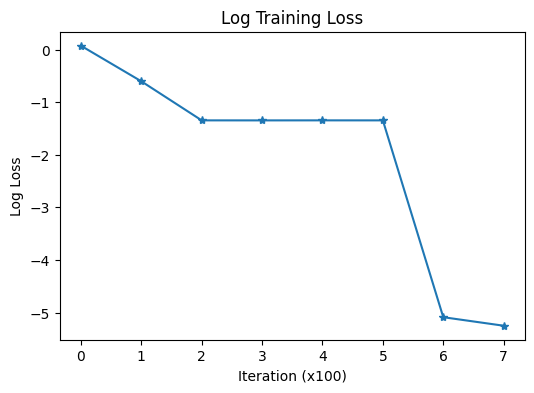

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 77.24 seconds.
Number of NaN losses encountered: 0


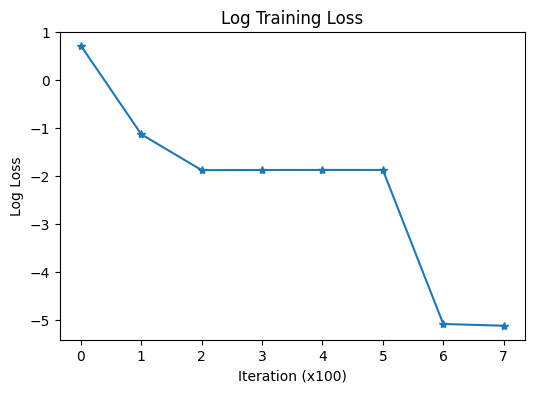

Time step 0 Loss: 0.1506912107954804
Final value at time 0: 6.918203830718994
-----------------------------------------------
Run: 9.0000
Time step 4 Loss: 0.01041088923742791
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 79.00 seconds.
Number of NaN losses encountered: 0


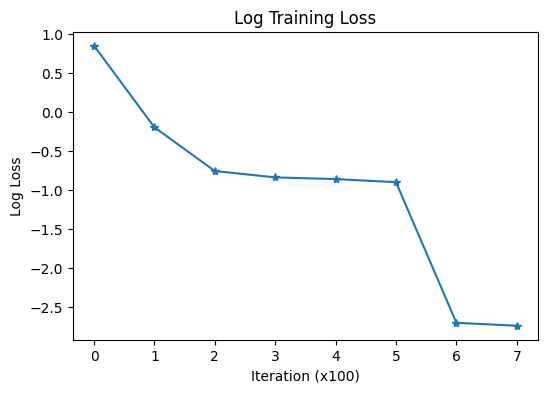

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.33 seconds.
Number of NaN losses encountered: 0


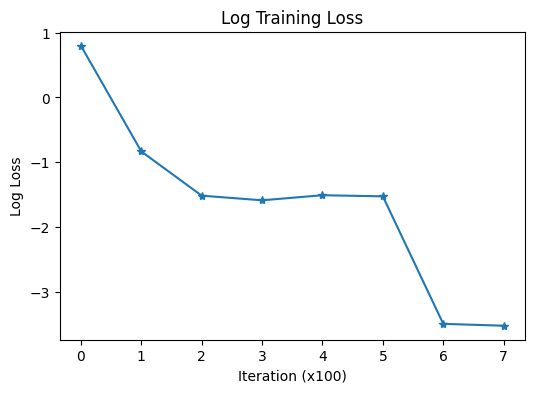

Time step 3 Loss: 3.7024086856842042
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 79.58 seconds.
Number of NaN losses encountered: 0


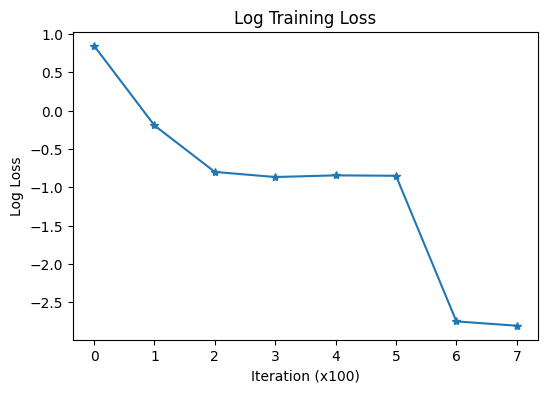

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 76.57 seconds.
Number of NaN losses encountered: 0


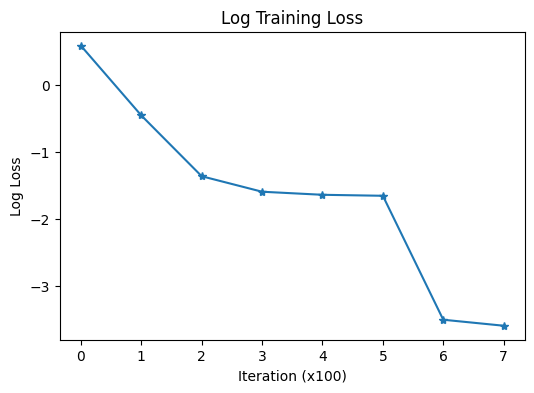

Time step 2 Loss: 2.436391017436981
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 74.14 seconds.
Number of NaN losses encountered: 0


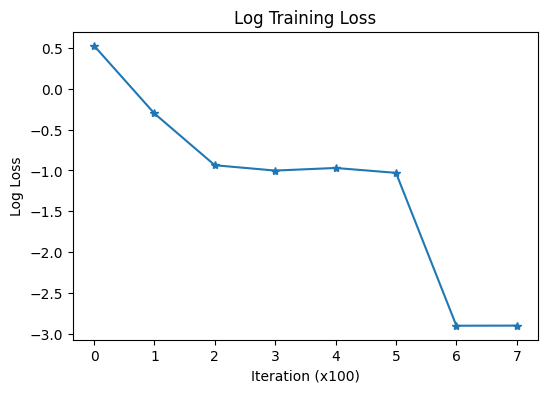

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.90 seconds.
Number of NaN losses encountered: 0


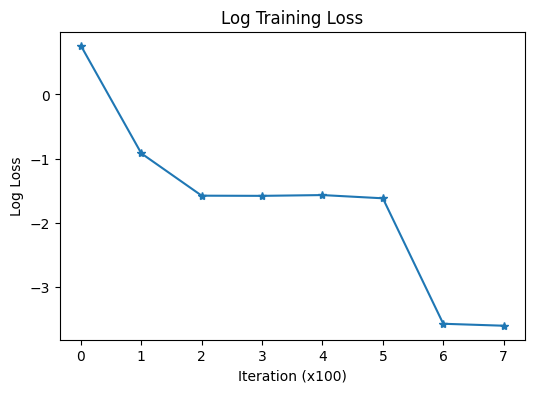

Time step 1 Loss: 1.1772481244802475
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 70.50 seconds.
Number of NaN losses encountered: 0


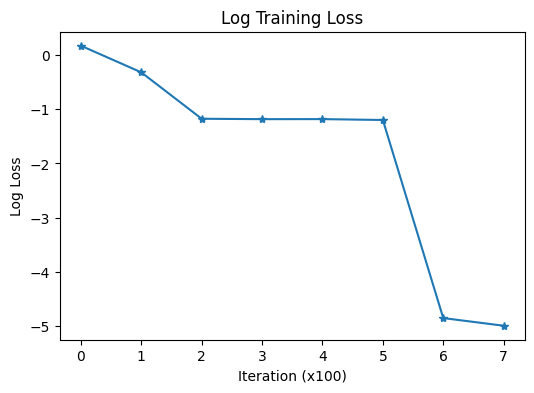

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 75.80 seconds.
Number of NaN losses encountered: 0


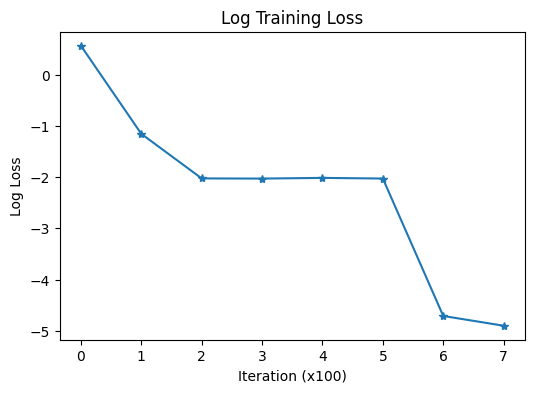

Time step 0 Loss: 0.09220830551436848
Final value at time 0: 5.565773963928223
Average Final Value: 6.9565
Standard Deviation: 0.9933
Comparison with distance_squared: 6.5000


In [4]:
# Number of runs
num_runs = 10

# Store results
final_values = []
val_histories = []
loss_histories = []

# Run the function multiple times
for i in range(num_runs):
    print("-----------------------------------------------")
    print(f"Run: {i:.4f}")
    x_paths = generate_brownian_motion(num_paths=n_data,x_init=x_init, time_steps=time_steps, scale=scale_x)
    y_paths = generate_brownian_motion(num_paths=n_data,x_init=y_init, time_steps=time_steps, scale=scale_y)
    final_value, val_hist, loss_hist = train_dqn_instance(
        x_dim=1, y_dim=1, time_horizon=time_steps-1,
        samplepath_x=x_paths, samplepath_y=y_paths,
        n_opt=50, in_sample_size=40,
        device=device, discount=1, mem_size=3000, trunc_flag=True, n_iter = 750
    )
    
    final_values.append(final_value)
    val_histories.append(val_hist)
    loss_histories.append(loss_hist)

# Compute statistics
final_values = np.array(final_values)
mean_final_value = np.mean(final_values)
std_final_value = np.std(final_values)


# Print results
print(f"Average Final Value: {mean_final_value:.4f}")
print(f"Standard Deviation: {std_final_value:.4f}")
print(f"Comparison with distance_squared: {distance_squared:.4f}")

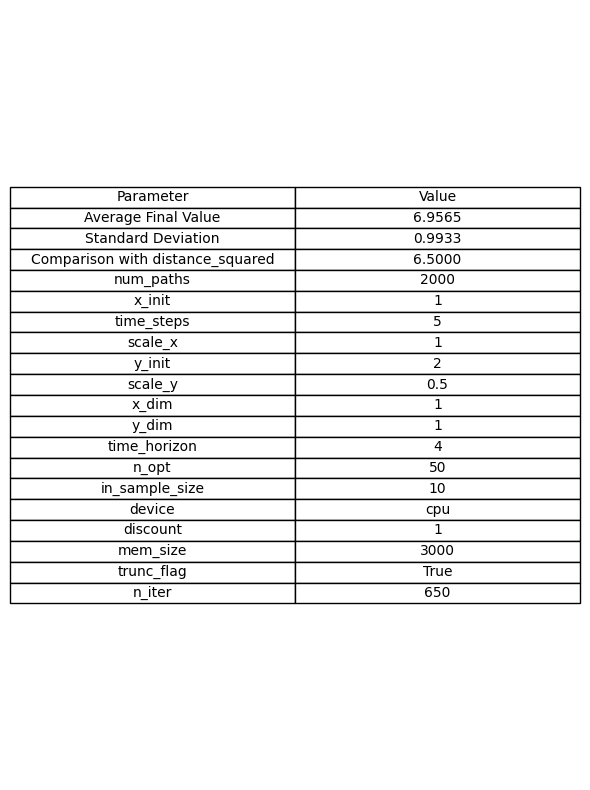

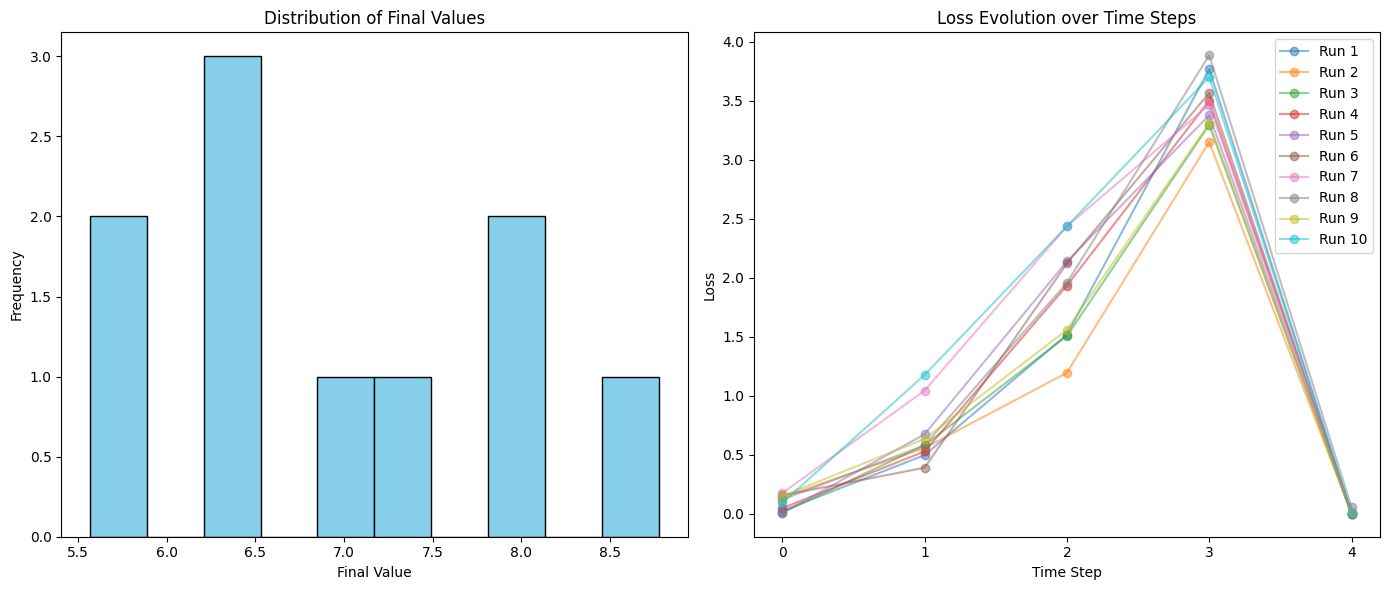

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Create a PNG table with the parameters and computed results
# -------------------------

# Prepare table data: computed values and the parameters used.
table_data = [
    ["Average Final Value", f"{mean_final_value:.4f}"],
    ["Standard Deviation", f"{std_final_value:.4f}"],
    ["Comparison with distance_squared", f"{distance_squared:.4f}"],
    # Brownian motion parameters:
    ["num_paths", f"{n_data}"],
    ["x_init", f"{x_init}"],
    ["time_steps", f"{time_steps}"],
    ["scale_x", f"{scale_x}"],
    ["y_init", f"{y_init}"],
    ["scale_y", f"{scale_y}"],
    # DQN training parameters:
    ["x_dim", "1"],
    ["y_dim", "1"],
    ["time_horizon", f"{time_steps - 1}"],
    ["n_opt", "50"],
    ["in_sample_size", "10"],
    ["device", f"{device}"],
    ["discount", "1"],
    ["mem_size", "3000"],
    ["trunc_flag", "True"],
    ["n_iter", "650"]
]

# Create a figure for the table.
fig_table, ax_table = plt.subplots(figsize=(6, 8))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(
    cellText=table_data, 
    colLabels=["Parameter", "Value"], 
    cellLoc="center", 
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
fig_table.tight_layout()
plt.savefig("results_table.png", bbox_inches='tight')
plt.show()

# -------------------------
# Plot the distribution of final values and the loss evolution (w.r.t. time steps)
# -------------------------

fig, (ax_hist, ax_loss) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram of final values.
ax_hist.hist(final_values, bins=10, color='skyblue', edgecolor='black')
ax_hist.set_title("Distribution of Final Values")
ax_hist.set_xlabel("Final Value")
ax_hist.set_ylabel("Frequency")

# Plot the loss history for each run with respect to time steps (0 to 4)
# Assume that each loss_hist in loss_histories has a length corresponding to the number of time steps (e.g., 5)
time_steps_axis = np.arange(0, 5)  # Time steps: 0, 1, 2, 3, 4
for i in range(num_runs):
    ax_loss.plot(time_steps_axis, loss_histories[i], marker='o', alpha=0.5, label=f'Run {i+1}')
    
ax_loss.set_title("Loss Evolution over Time Steps")
ax_loss.set_xlabel("Time Step")
ax_loss.set_ylabel("Loss")
ax_loss.set_xticks(time_steps_axis)
ax_loss.legend()

plt.tight_layout()
plt.savefig("loss_and_final_values.png", bbox_inches='tight')
plt.show()


Time step 0 Loss: 0.011350940124611953
Final value at time 0: 4.033431529998779
Average Final Value: 6.2064
Standard Deviation: 1.9991
Comparison with distance_squared: 6.5000

2000 sample path n_opt = 20, in_sample size = 10

-----------------------------------------------
Run: 0.0000
Time step 4 Loss: 1.0089694798125493e-05
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 76.71 seconds.
Number of NaN losses encountered: 0


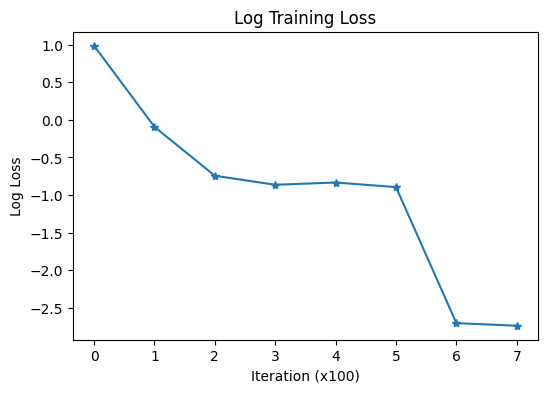

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.69 seconds.
Number of NaN losses encountered: 0


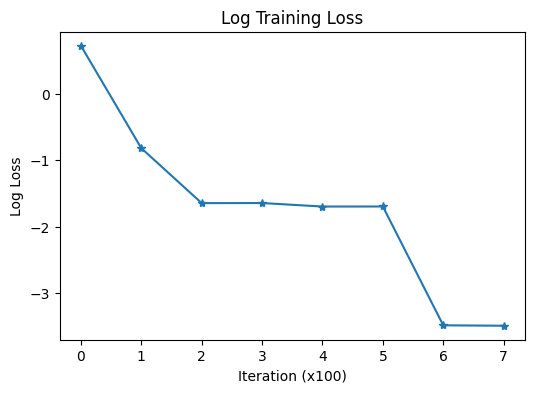

/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:311: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_x = torch.tensor(x_est, dtype=torch.float32).reshape(-1, 1)
/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:312: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_y = torch.tensor(y_est, dtype=torch.float32).reshape(-1, 1)


Time step 3 Loss: 3.272802543640137
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 77.79 seconds.
Number of NaN losses encountered: 0


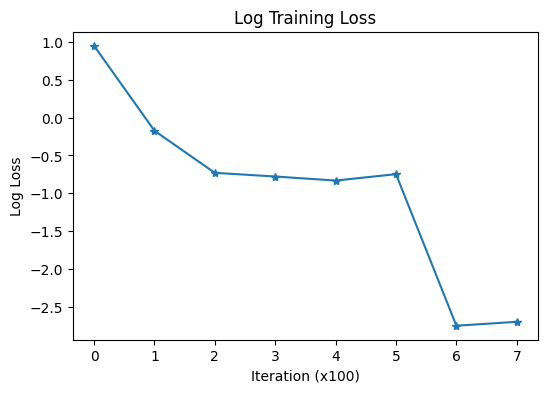

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 89.69 seconds.
Number of NaN losses encountered: 0


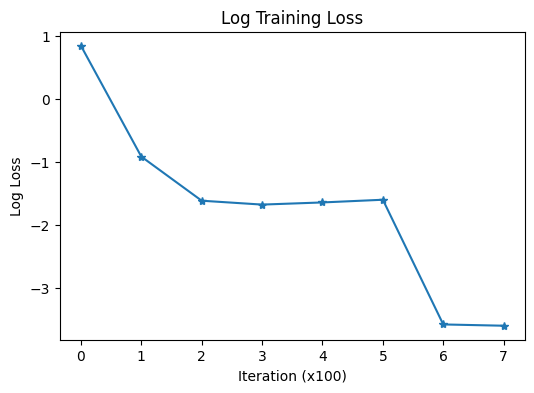

Time step 2 Loss: 1.3433498430252075
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.04 seconds.
Number of NaN losses encountered: 0


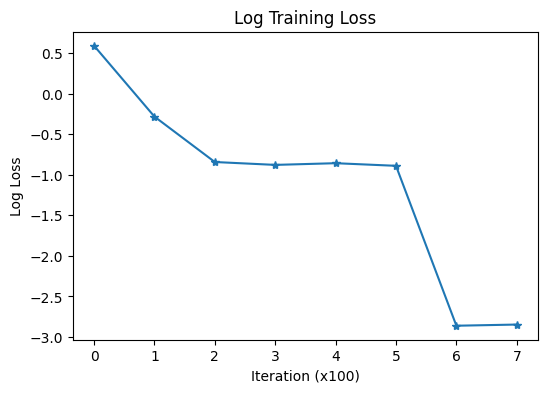

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 85.78 seconds.
Number of NaN losses encountered: 0


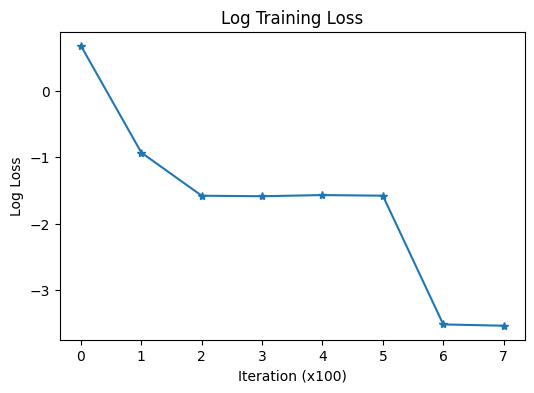

Time step 1 Loss: 0.42160352975130083
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 74.53 seconds.
Number of NaN losses encountered: 0


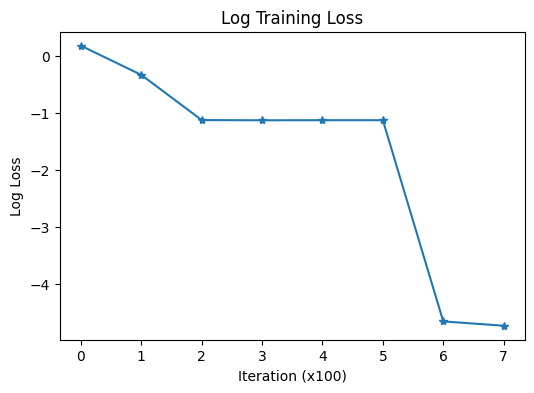

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.18 seconds.
Number of NaN losses encountered: 0


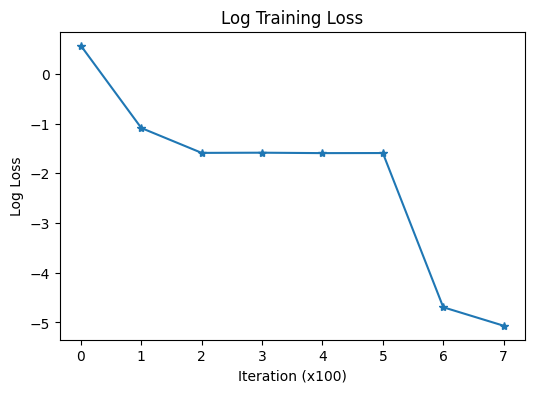

Time step 0 Loss: 0.12508776974893407
Final value at time 0: 6.685410499572754
-----------------------------------------------
Run: 1.0000
Time step 4 Loss: 0.018309924571076407
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 84.54 seconds.
Number of NaN losses encountered: 0


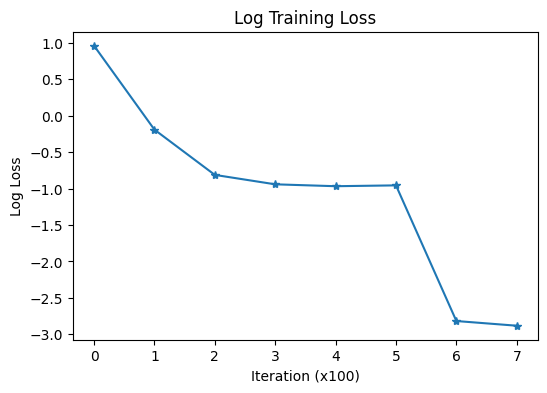

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 82.87 seconds.
Number of NaN losses encountered: 0


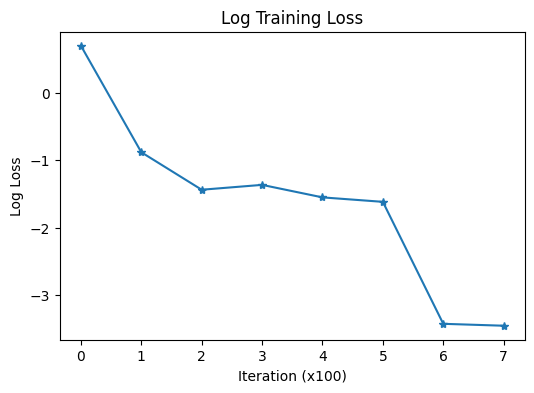

Time step 3 Loss: 2.9724186396598817
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 80.04 seconds.
Number of NaN losses encountered: 0


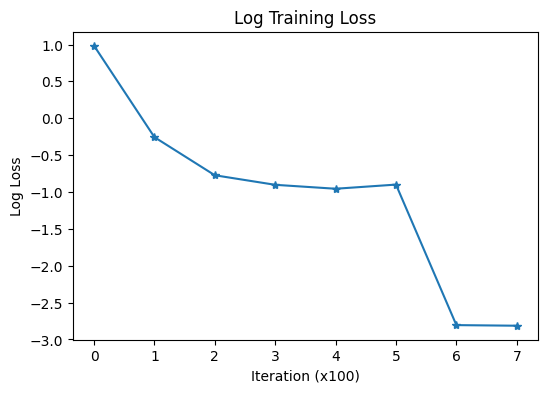

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 87.40 seconds.
Number of NaN losses encountered: 0


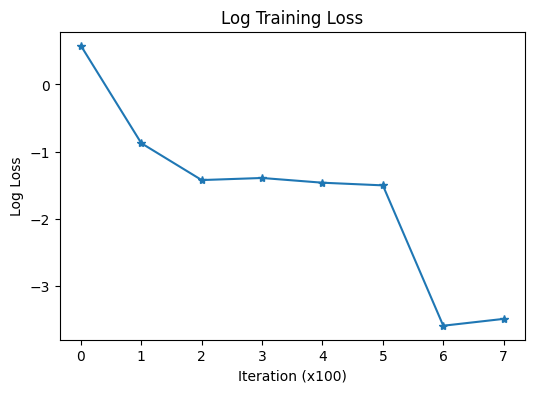

Time step 2 Loss: 1.7637049198150634
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 81.30 seconds.
Number of NaN losses encountered: 0


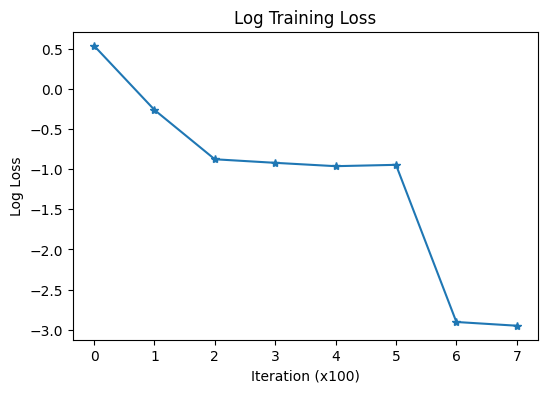

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 85.61 seconds.
Number of NaN losses encountered: 0


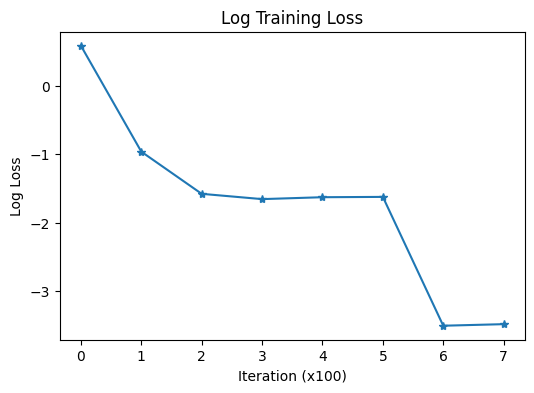

Time step 1 Loss: 0.7542866465449333
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 494.58 seconds.
Number of NaN losses encountered: 0


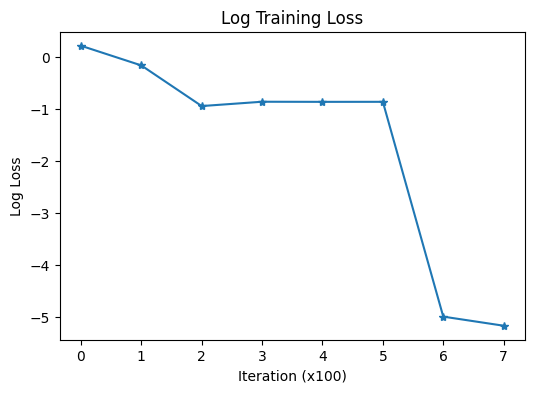

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 89.87 seconds.
Number of NaN losses encountered: 0


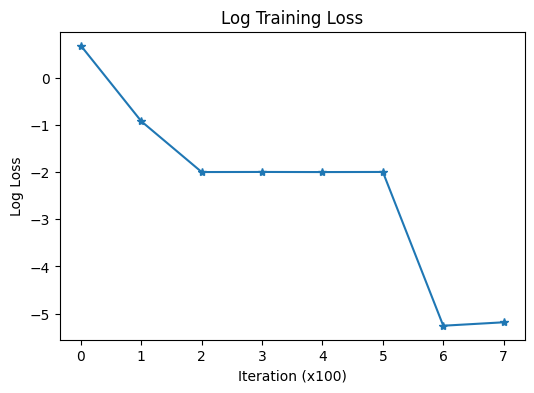

Time step 0 Loss: 0.1811621384526552
Final value at time 0: 6.53250789642334
-----------------------------------------------
Run: 2.0000
Time step 4 Loss: 0.0035783128801267594
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1089.78 seconds.
Number of NaN losses encountered: 0


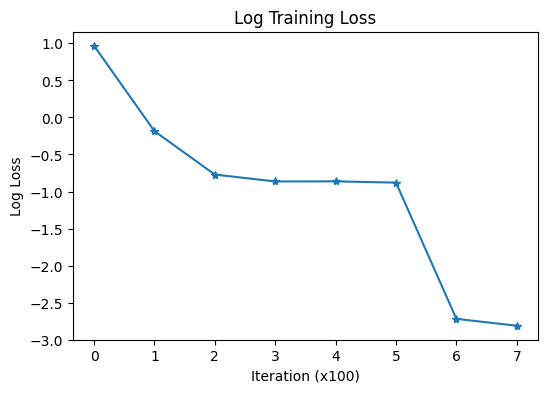

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1170.22 seconds.
Number of NaN losses encountered: 0


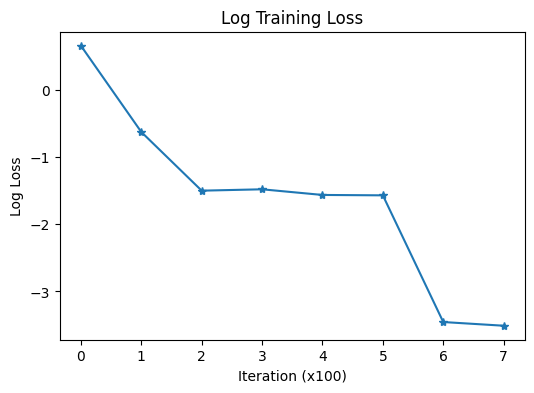

Time step 3 Loss: 3.3675115132331848
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 241.76 seconds.
Number of NaN losses encountered: 0


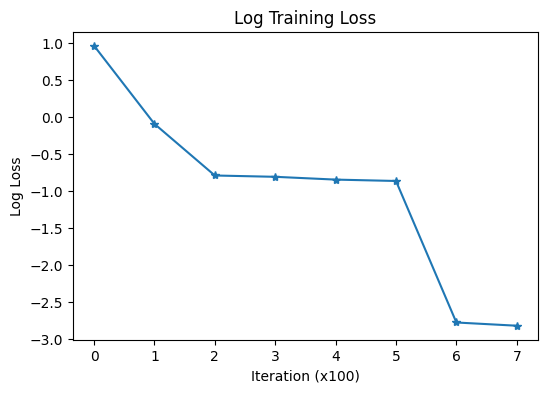

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1157.74 seconds.
Number of NaN losses encountered: 0


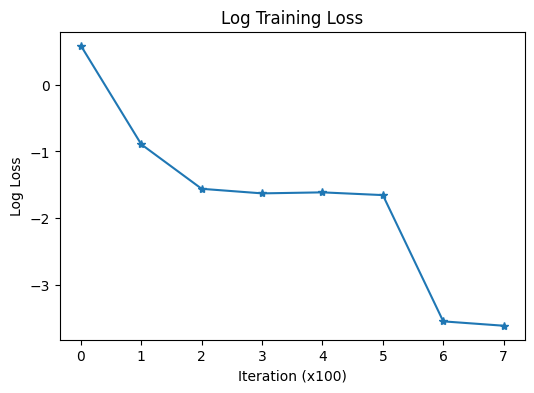

Time step 2 Loss: 2.1248191010952
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1038.40 seconds.
Number of NaN losses encountered: 0


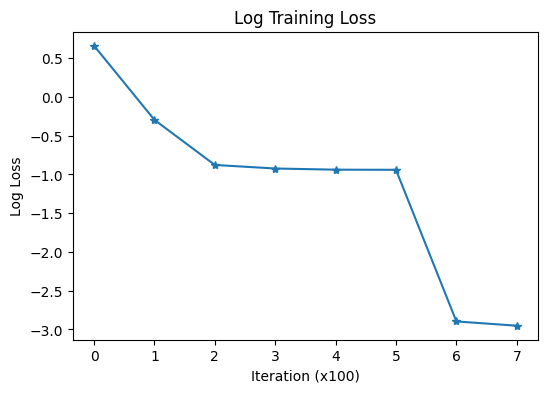

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1088.94 seconds.
Number of NaN losses encountered: 0


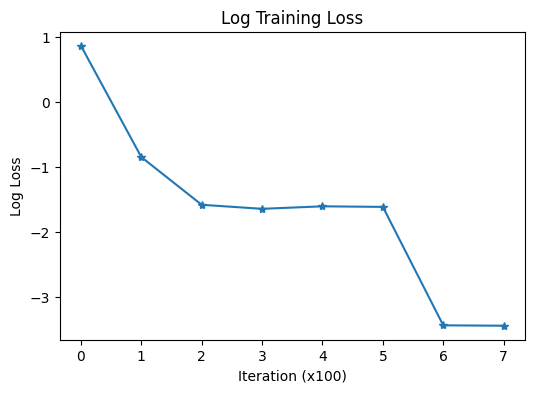

Time step 1 Loss: 0.5516459035873413
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1040.96 seconds.
Number of NaN losses encountered: 0


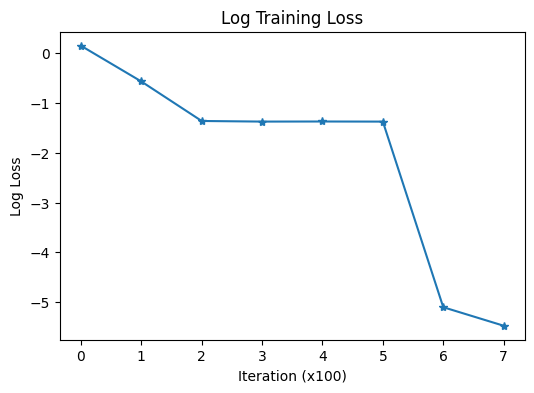

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 91.23 seconds.
Number of NaN losses encountered: 0


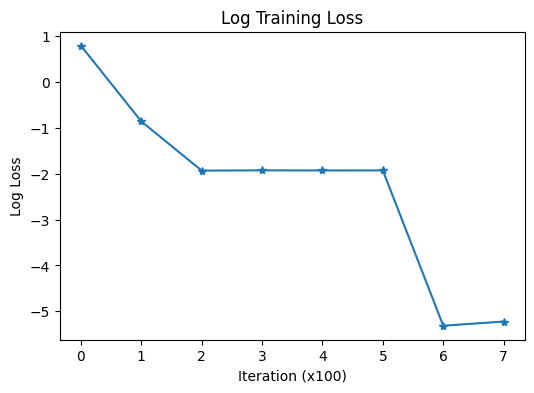

Time step 0 Loss: 0.0191398178917575
Final value at time 0: 6.2796950340271
-----------------------------------------------
Run: 3.0000
Time step 4 Loss: 7.218294393055657e-05
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 95.77 seconds.
Number of NaN losses encountered: 0


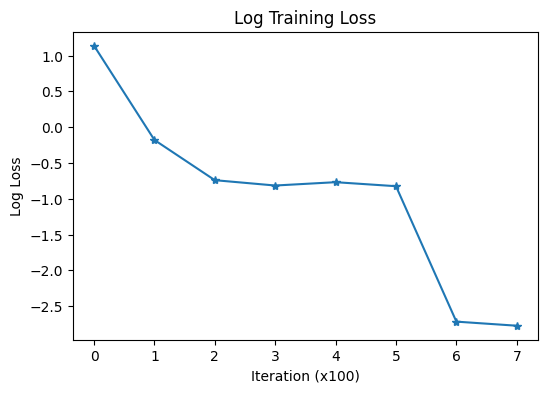

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 991.74 seconds.
Number of NaN losses encountered: 0


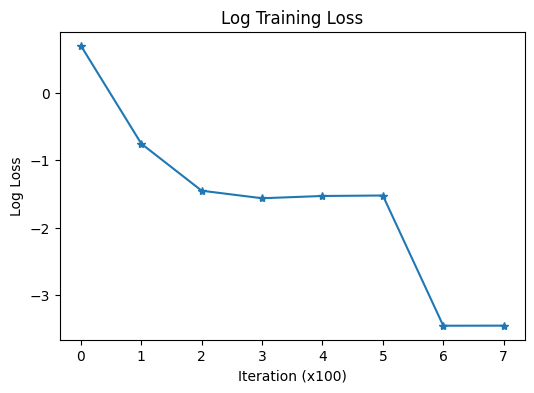

Time step 3 Loss: 2.8987312865257264
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 104.05 seconds.
Number of NaN losses encountered: 0


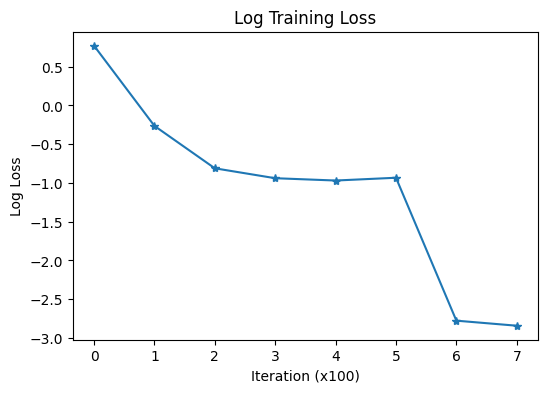

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1011.38 seconds.
Number of NaN losses encountered: 0


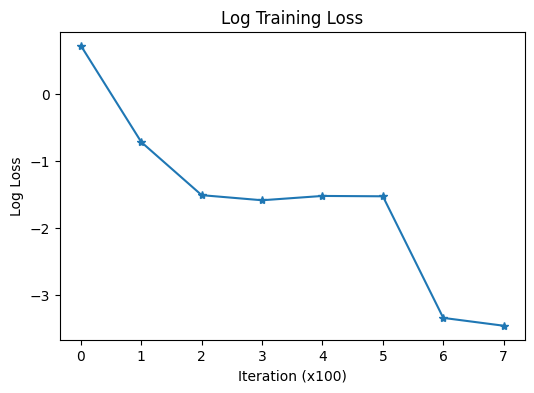

Time step 2 Loss: 1.385445466041565
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1099.08 seconds.
Number of NaN losses encountered: 0


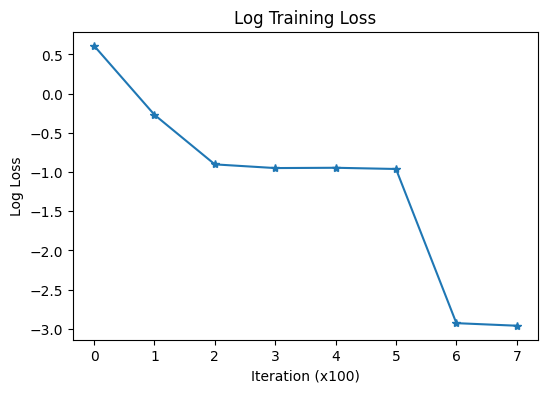

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 110.45 seconds.
Number of NaN losses encountered: 0


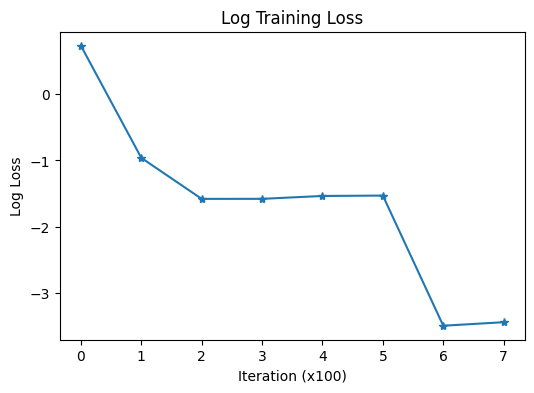

Time step 1 Loss: 0.3038617631793022
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 110.24 seconds.
Number of NaN losses encountered: 0


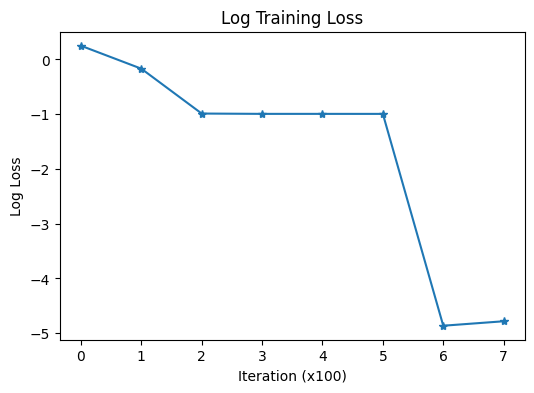

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1021.78 seconds.
Number of NaN losses encountered: 0


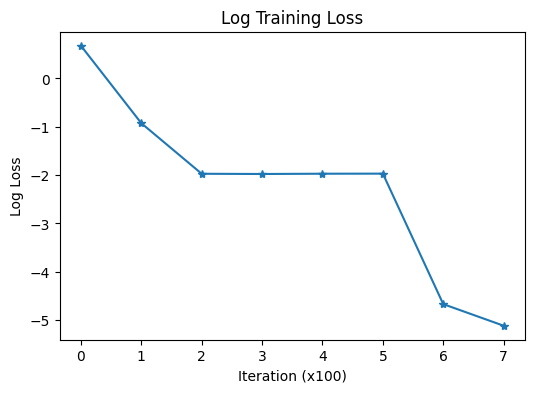

Time step 0 Loss: 0.03387618898210348
Final value at time 0: 6.6989359855651855
-----------------------------------------------
Run: 4.0000
Time step 4 Loss: 0.0009729094962494855
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 76.25 seconds.
Number of NaN losses encountered: 0


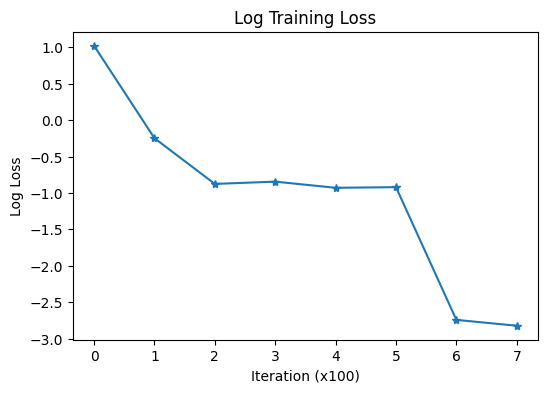

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 81.32 seconds.
Number of NaN losses encountered: 0


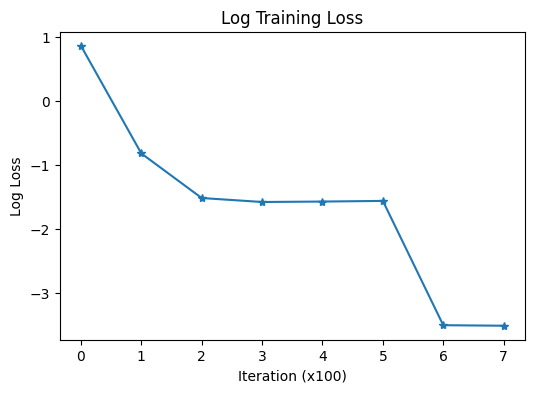

Time step 3 Loss: 3.3044820165634157
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 76.71 seconds.
Number of NaN losses encountered: 0


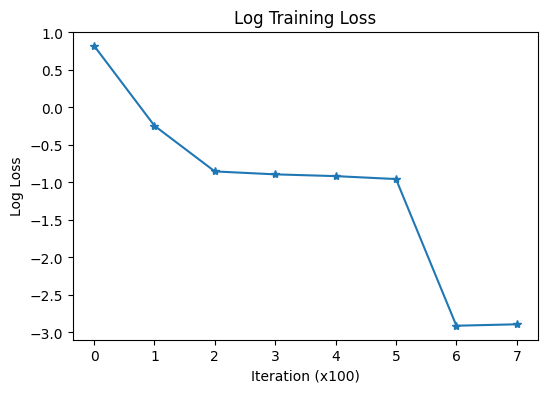

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 81.53 seconds.
Number of NaN losses encountered: 0


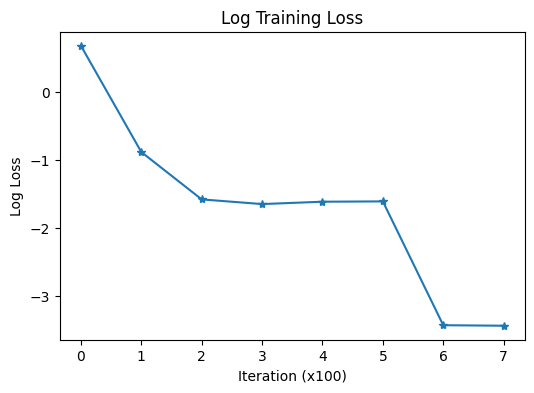

Time step 2 Loss: 2.1335698795318603
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 795.35 seconds.
Number of NaN losses encountered: 0


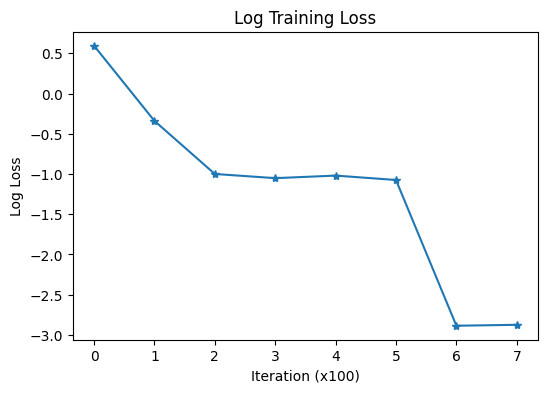

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 390.10 seconds.
Number of NaN losses encountered: 0


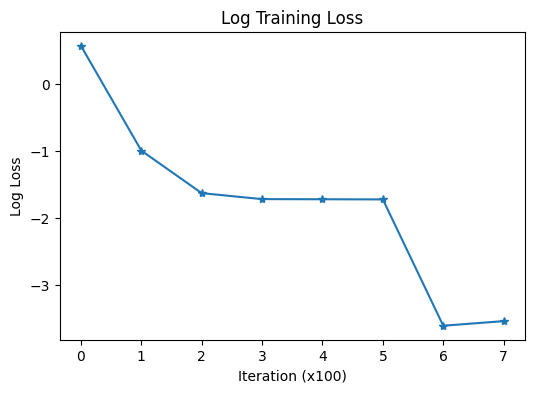

Time step 1 Loss: 0.5363730715215206
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.63 seconds.
Number of NaN losses encountered: 0


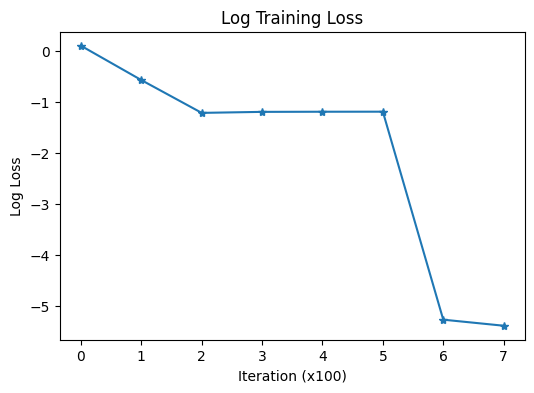

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.16 seconds.
Number of NaN losses encountered: 0


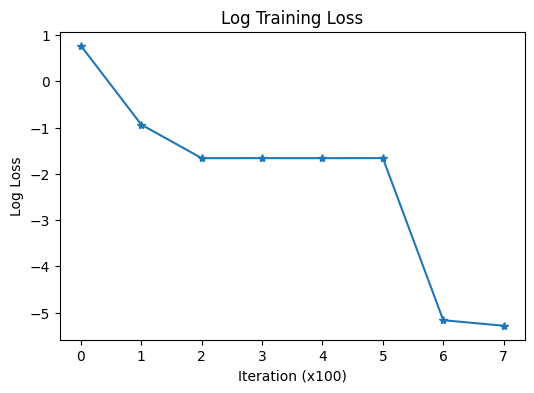

Time step 0 Loss: 0.060086560887504845
Final value at time 0: 5.959782600402832
-----------------------------------------------
Run: 5.0000
Time step 4 Loss: 0.0020830275607295334
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.86 seconds.
Number of NaN losses encountered: 0


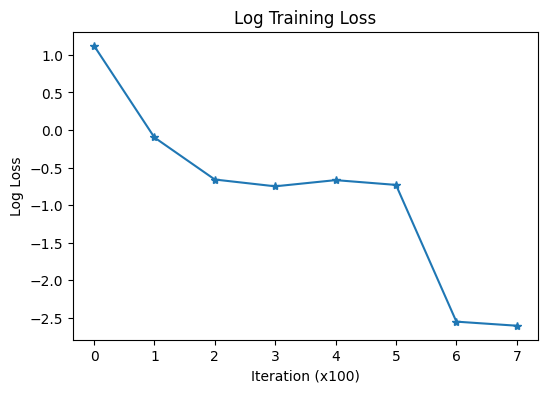

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.79 seconds.
Number of NaN losses encountered: 0


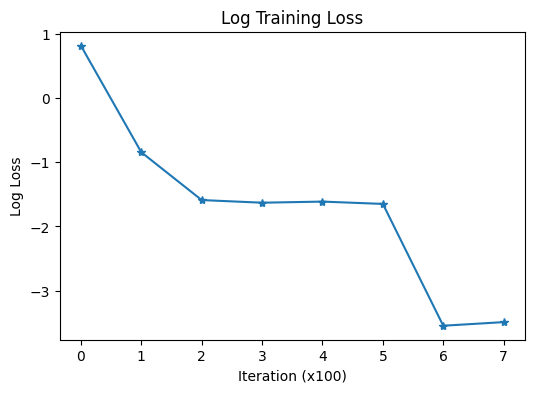

Time step 3 Loss: 3.518383960723877
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 48.83 seconds.
Number of NaN losses encountered: 0


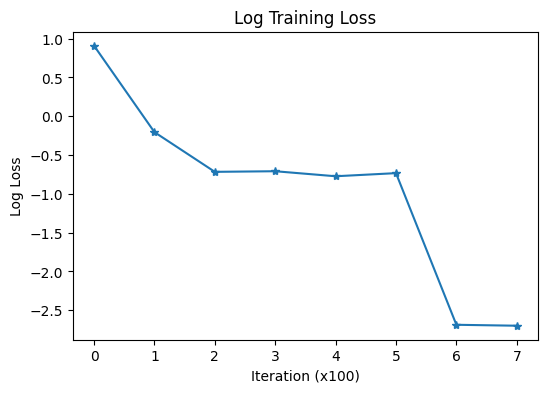

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 46.67 seconds.
Number of NaN losses encountered: 0


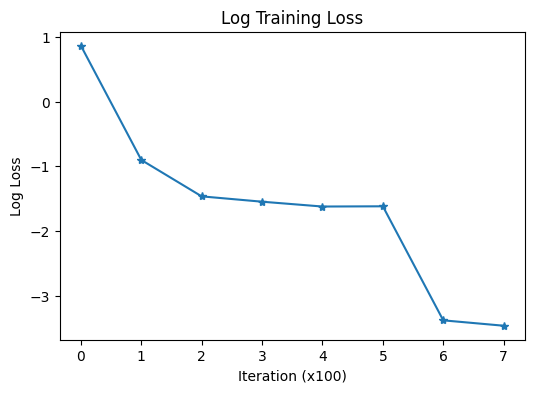

Time step 2 Loss: 2.4302326607704163
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 46.84 seconds.
Number of NaN losses encountered: 0


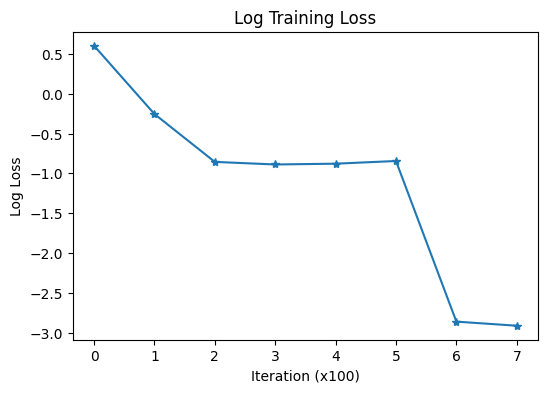

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 46.34 seconds.
Number of NaN losses encountered: 0


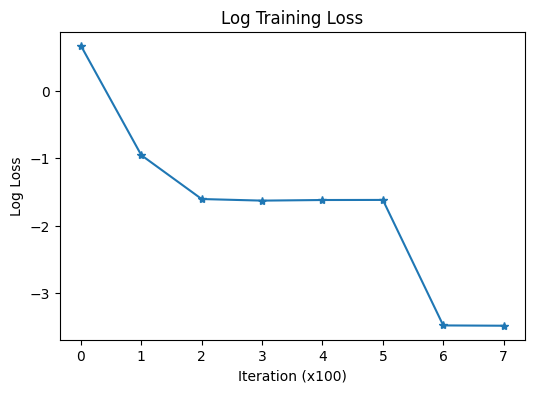

Time step 1 Loss: 0.7393904379010201
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.33 seconds.
Number of NaN losses encountered: 0


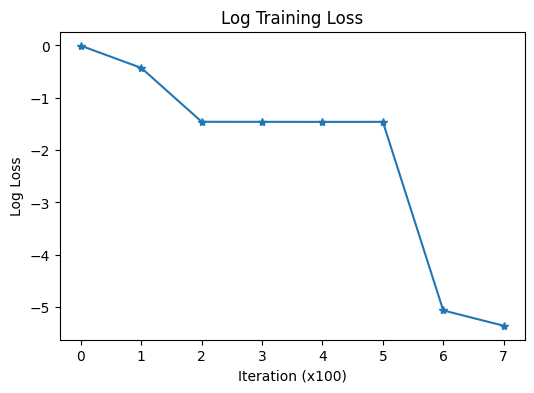

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.93 seconds.
Number of NaN losses encountered: 0


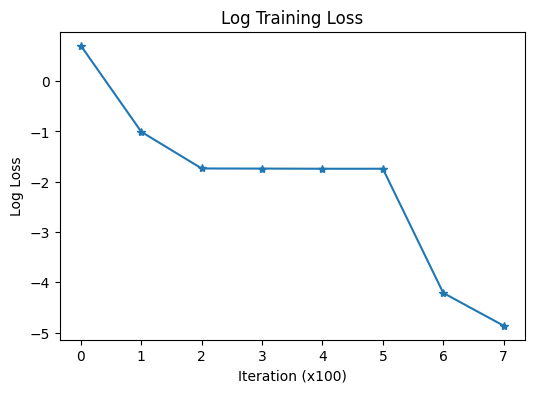

Time step 0 Loss: 0.008374609798220262
Final value at time 0: 8.71096420288086
-----------------------------------------------
Run: 6.0000
Time step 4 Loss: 0.1237082364410162
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.68 seconds.
Number of NaN losses encountered: 0


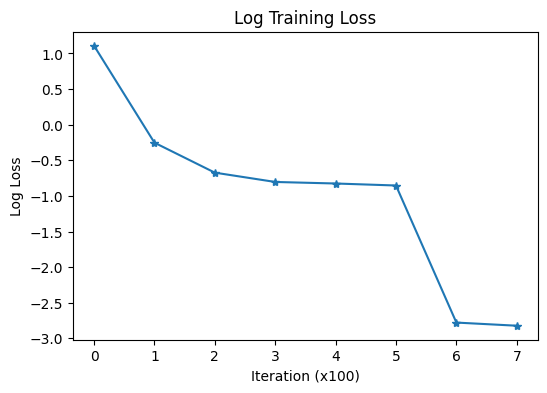

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.69 seconds.
Number of NaN losses encountered: 0


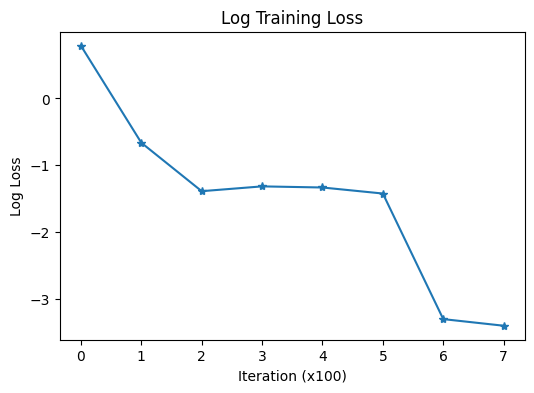

Time step 3 Loss: 3.1186905241012575
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 49.47 seconds.
Number of NaN losses encountered: 0


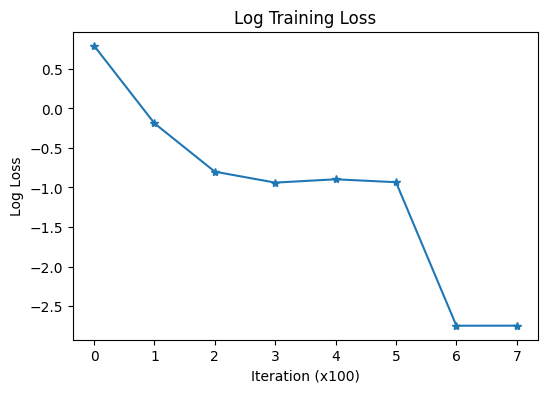

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 48.45 seconds.
Number of NaN losses encountered: 0


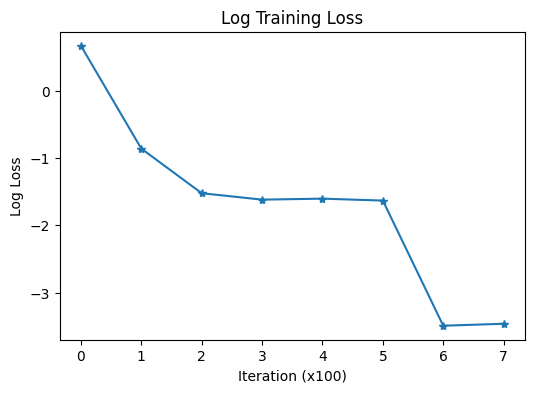

Time step 2 Loss: 2.1688294196128846
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 46.81 seconds.
Number of NaN losses encountered: 0


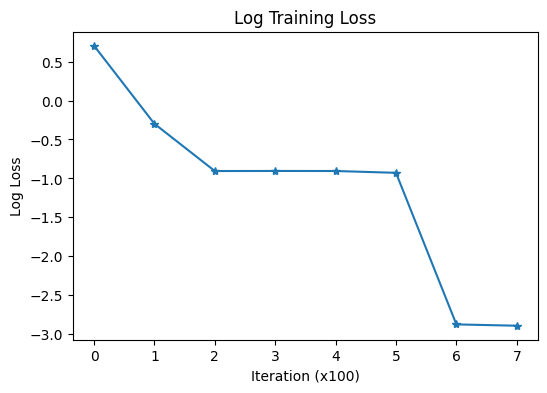

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 47.61 seconds.
Number of NaN losses encountered: 0


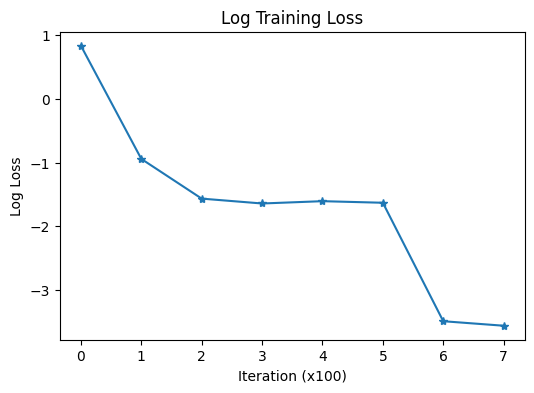

Time step 1 Loss: 0.4587171658873558
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 1343.49 seconds.
Number of NaN losses encountered: 0


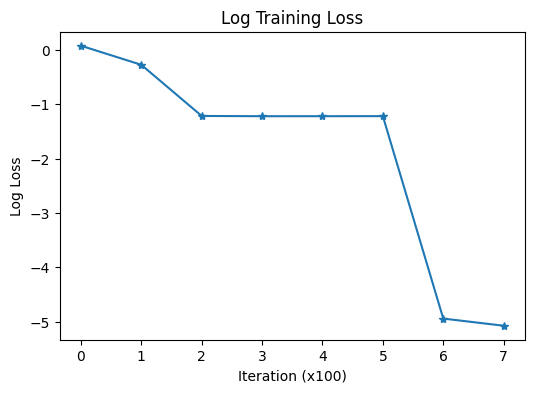

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 39.39 seconds.
Number of NaN losses encountered: 0


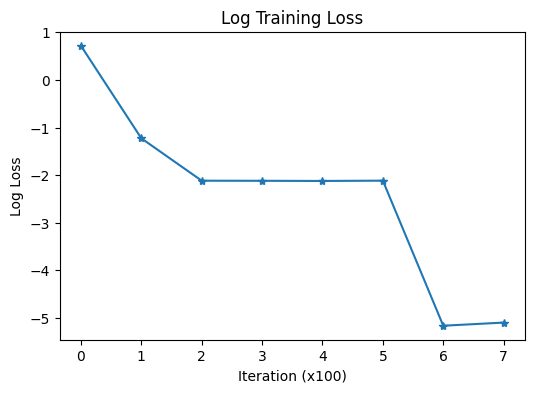

Time step 0 Loss: 0.001400532635560694
Final value at time 0: 7.830199241638184
-----------------------------------------------
Run: 7.0000
Time step 4 Loss: 0.07659301795531065
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.73 seconds.
Number of NaN losses encountered: 0


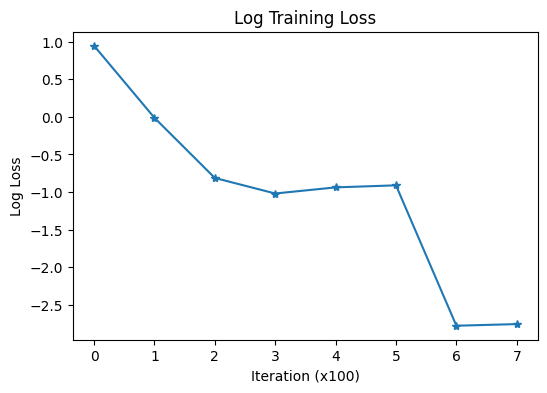

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.74 seconds.
Number of NaN losses encountered: 0


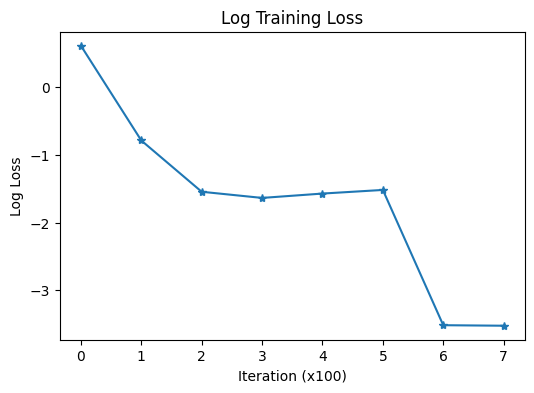

Time step 3 Loss: 3.473452477455139
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 761.22 seconds.
Number of NaN losses encountered: 0


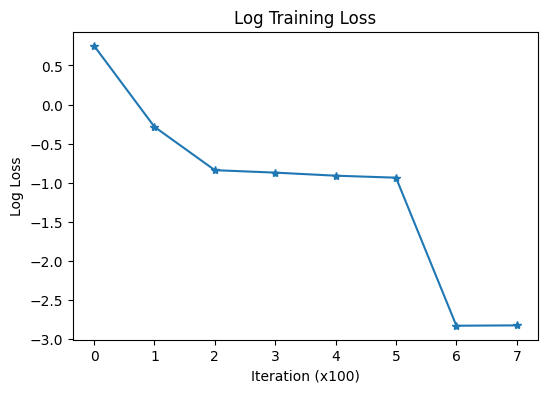

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 147.80 seconds.
Number of NaN losses encountered: 0


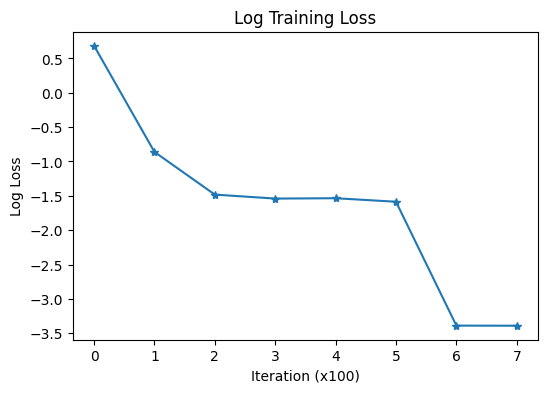

Time step 2 Loss: 1.8178114736080169
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.80 seconds.
Number of NaN losses encountered: 0


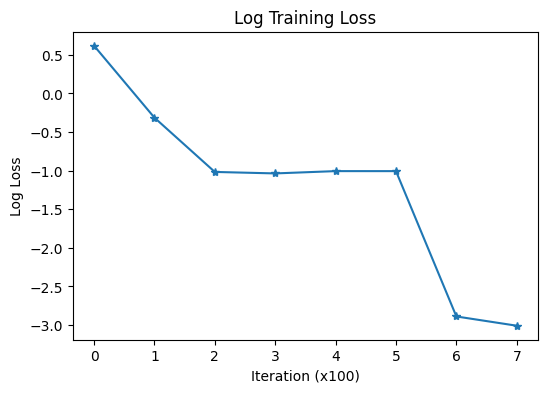

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.48 seconds.
Number of NaN losses encountered: 0


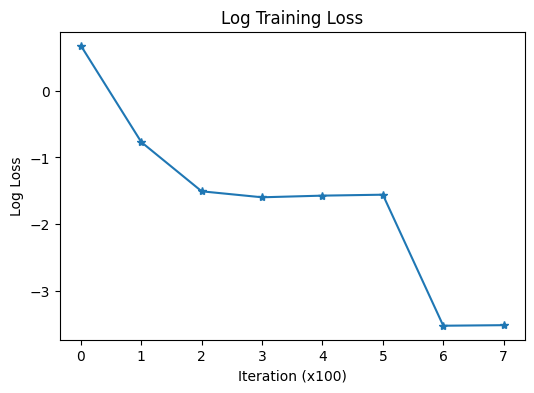

Time step 1 Loss: 0.4697502028942108
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.13 seconds.
Number of NaN losses encountered: 0


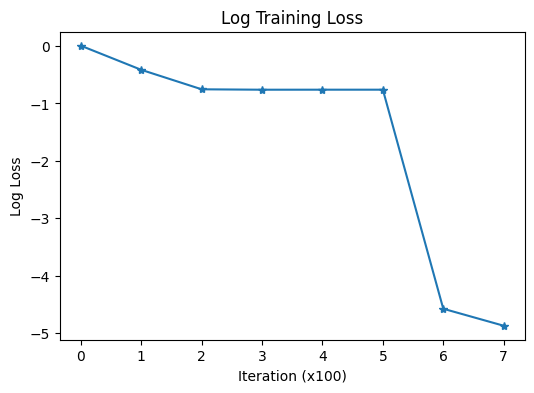

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.76 seconds.
Number of NaN losses encountered: 0


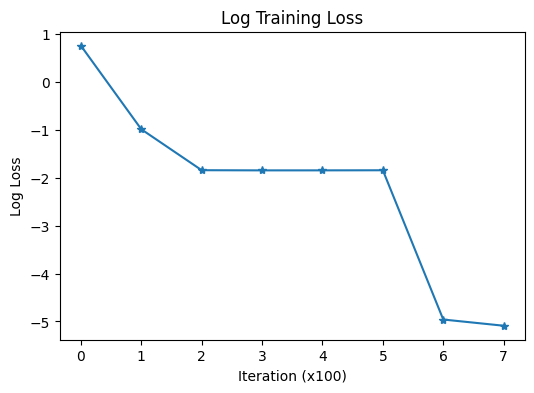

Time step 0 Loss: 0.06311329560333434
Final value at time 0: 7.670949459075928
-----------------------------------------------
Run: 8.0000
Time step 4 Loss: 0.094978420548141
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 41.93 seconds.
Number of NaN losses encountered: 0


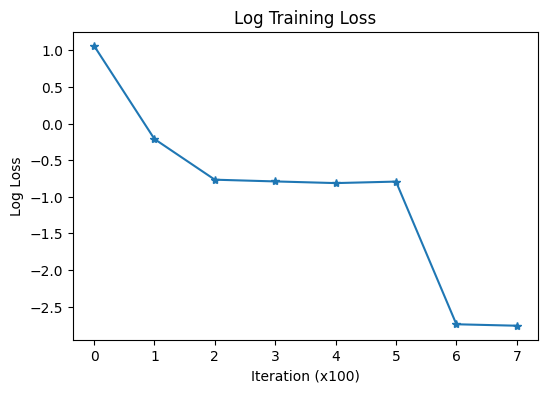

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.48 seconds.
Number of NaN losses encountered: 0


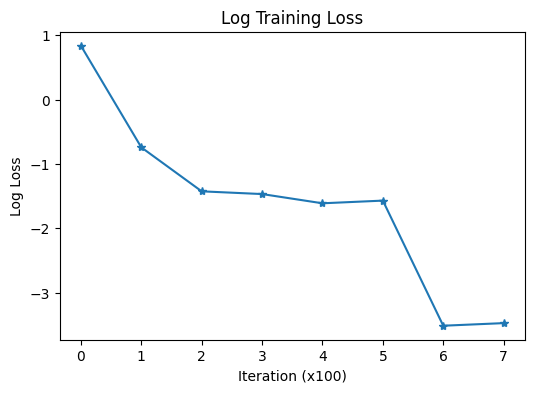

Time step 3 Loss: 3.2687857437133787
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.94 seconds.
Number of NaN losses encountered: 0


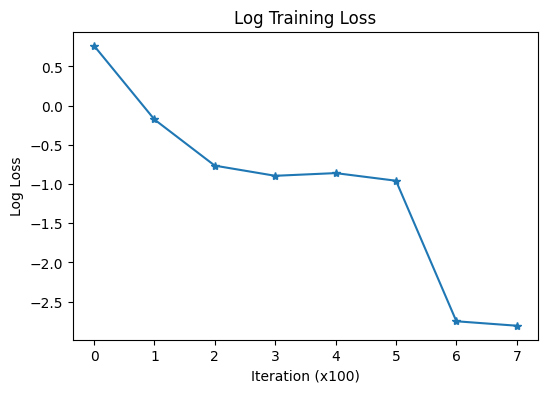

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.00 seconds.
Number of NaN losses encountered: 0


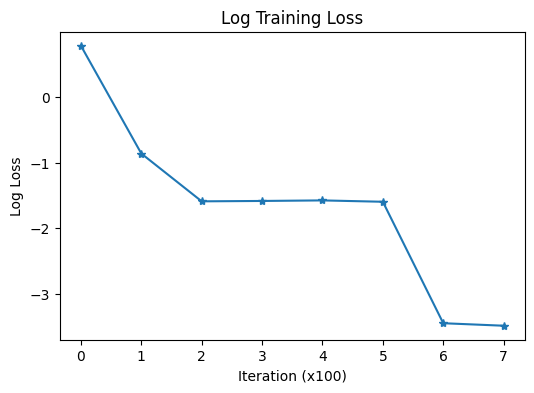

Time step 2 Loss: 2.2759865617752073
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.77 seconds.
Number of NaN losses encountered: 0


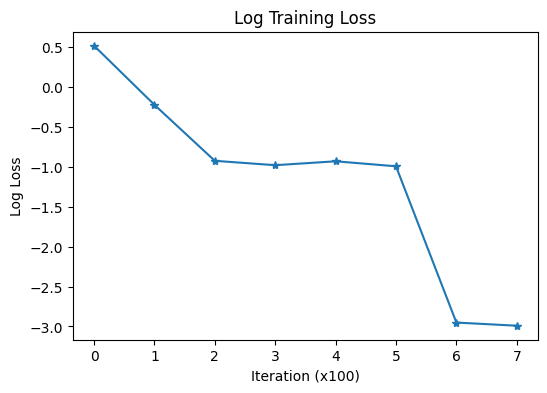

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 37.54 seconds.
Number of NaN losses encountered: 0


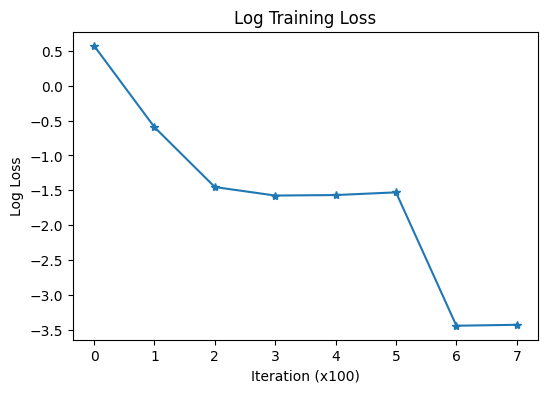

Time step 1 Loss: 0.8023365581035614
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 35.60 seconds.
Number of NaN losses encountered: 0


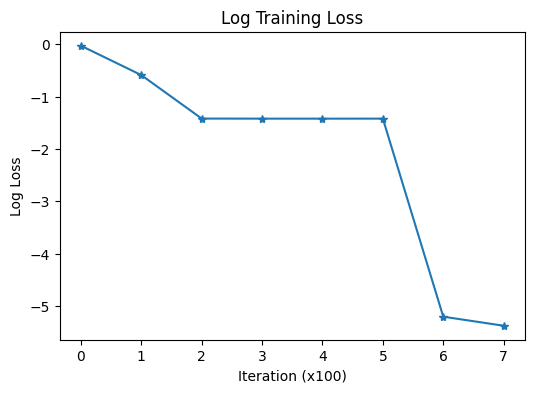

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 34.49 seconds.
Number of NaN losses encountered: 0


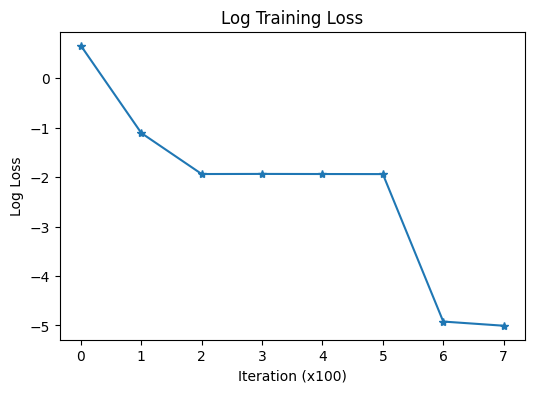

Time step 0 Loss: 0.007219719446504768
Final value at time 0: 6.628400802612305
-----------------------------------------------
Run: 9.0000
Time step 4 Loss: 0.05266185409403988
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 38.34 seconds.
Number of NaN losses encountered: 0


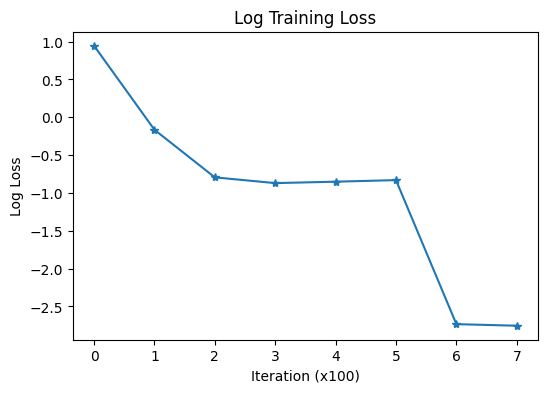

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 39.43 seconds.
Number of NaN losses encountered: 0


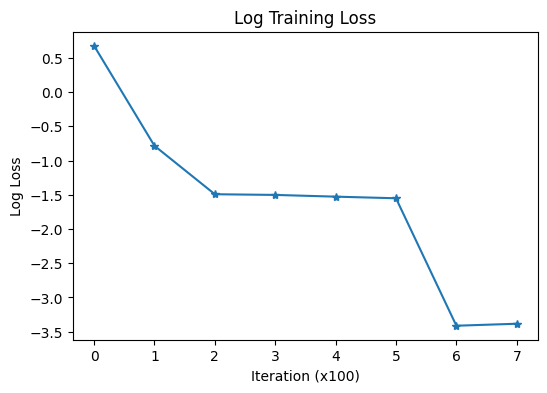

Time step 3 Loss: 3.374445562362671
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 39.81 seconds.
Number of NaN losses encountered: 0


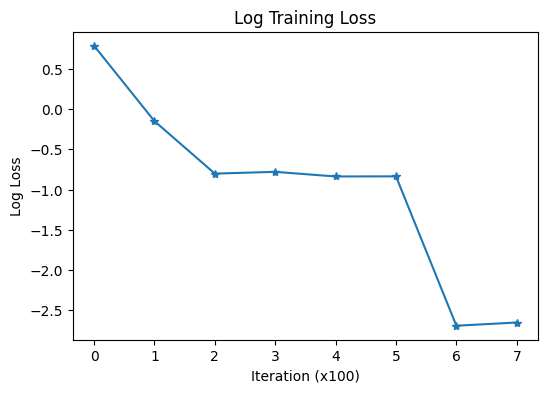

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.72 seconds.
Number of NaN losses encountered: 0


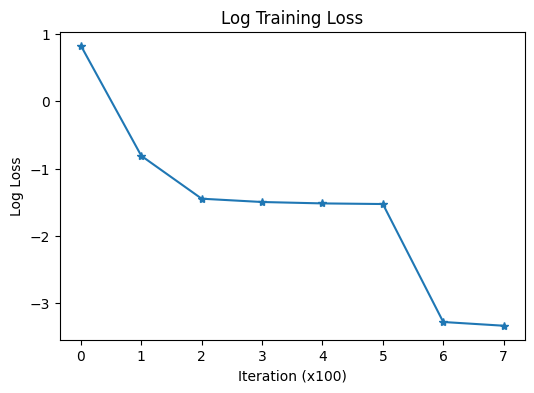

Time step 2 Loss: 2.1799630880355836
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 40.45 seconds.
Number of NaN losses encountered: 0


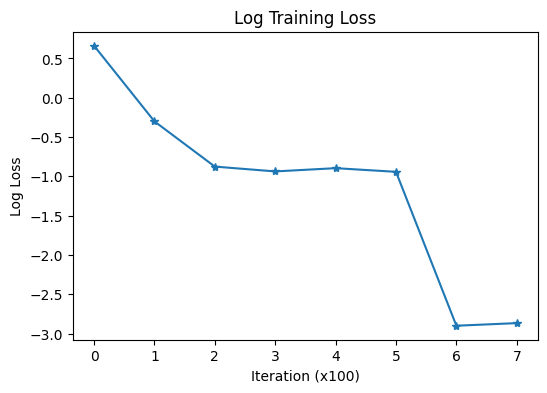

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 43.19 seconds.
Number of NaN losses encountered: 0


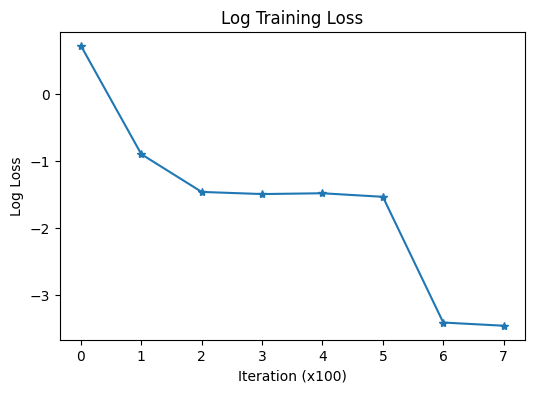

Time step 1 Loss: 1.0177624475955964
44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.56 seconds.
Number of NaN losses encountered: 0


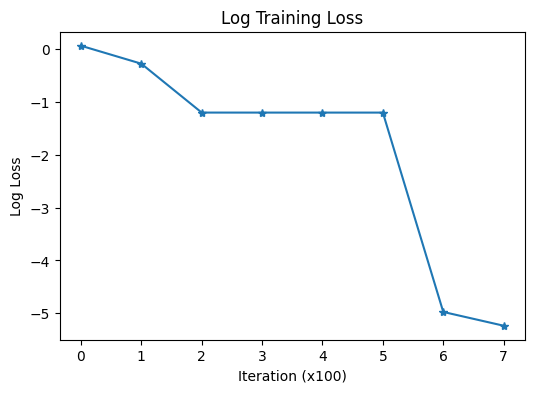

44
Training progress: 0/749
Training progress: 100/749
Training progress: 200/749
Training progress: 300/749
Training progress: 400/749
Training progress: 500/749
Training progress: 600/749
Training progress: 700/749
Training took 36.72 seconds.
Number of NaN losses encountered: 0


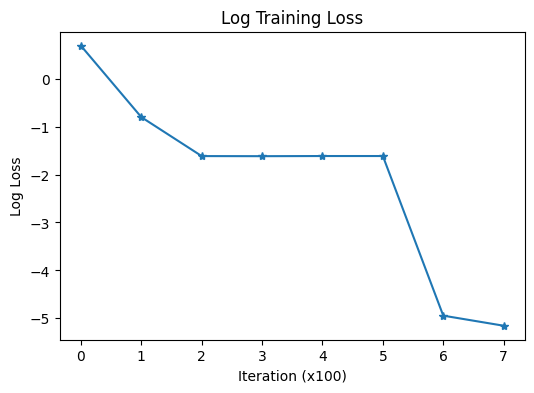

Time step 0 Loss: 0.05194788391532938
Final value at time 0: 6.326149940490723
Average Final Value: 6.9323
Standard Deviation: 0.8138
Comparison with distance_squared: 6.5000


In [6]:
from FVI import train_dqn_instance_no_outlier

# Number of runs
num_runs = 10

# Store results
final_values = []
val_histories = []
loss_histories = []

n_data = 2100 #to account for outlier dsicard

# Run the function multiple times
for i in range(num_runs):
    print("-----------------------------------------------")
    print(f"Run: {i:.4f}")
    x_paths = generate_brownian_motion(num_paths=n_data,x_init=x_init, time_steps=time_steps, scale=scale_x)
    y_paths = generate_brownian_motion(num_paths=n_data,x_init=y_init, time_steps=time_steps, scale=scale_y)
    final_value, val_hist, loss_hist = train_dqn_instance_no_outlier(
        x_dim=1, y_dim=1, time_horizon=time_steps-1,
        samplepath_x=x_paths, samplepath_y=y_paths,
        n_opt=50, in_sample_size=40,
        device=device, discount=1, mem_size=3000, trunc_flag=True, n_iter = 750
    )
    
    final_values.append(final_value)
    val_histories.append(val_hist)
    loss_histories.append(loss_hist)

# Compute statistics
final_values = np.array(final_values)
mean_final_value = np.mean(final_values)
std_final_value = np.std(final_values)


# Print results
print(f"Average Final Value: {mean_final_value:.4f}")
print(f"Standard Deviation: {std_final_value:.4f}")
print(f"Comparison with distance_squared: {distance_squared:.4f}")

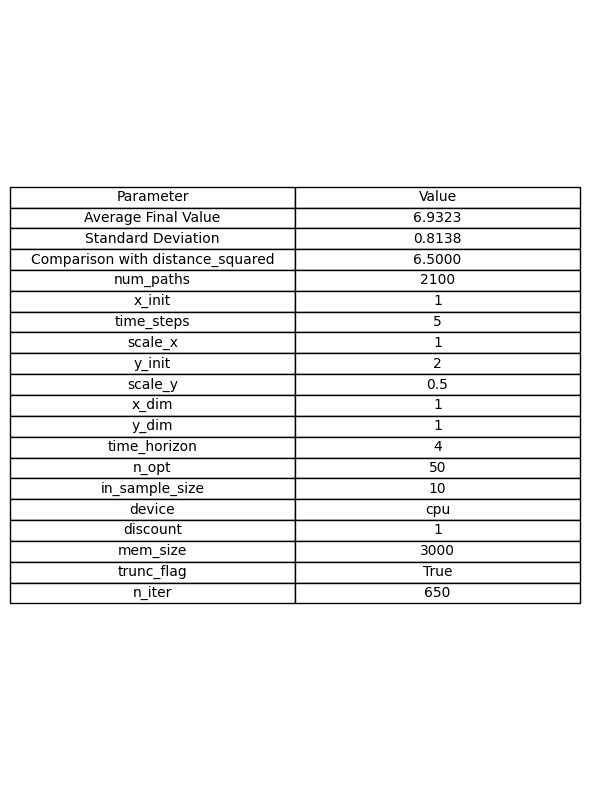

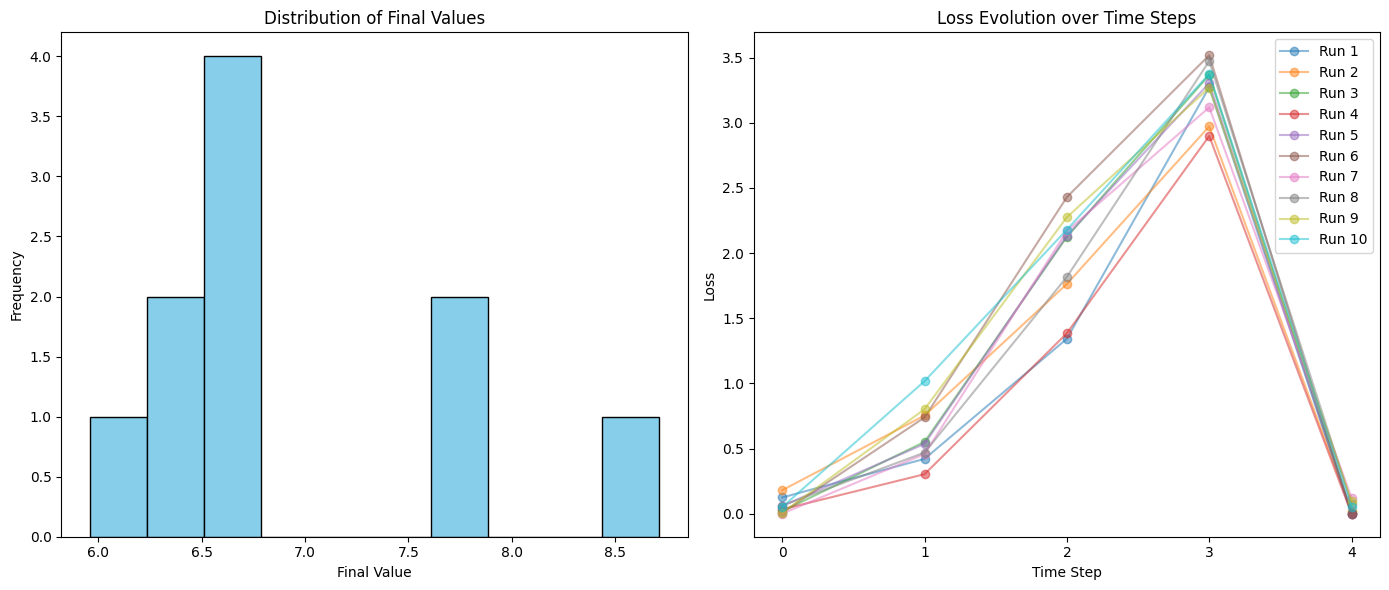

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Create a PNG table with the parameters and computed results
# -------------------------

# Prepare table data: computed values and the parameters used.
table_data = [
    ["Average Final Value", f"{mean_final_value:.4f}"],
    ["Standard Deviation", f"{std_final_value:.4f}"],
    ["Comparison with distance_squared", f"{distance_squared:.4f}"],
    # Brownian motion parameters:
    ["num_paths", f"{n_data}"],
    ["x_init", f"{x_init}"],
    ["time_steps", f"{time_steps}"],
    ["scale_x", f"{scale_x}"],
    ["y_init", f"{y_init}"],
    ["scale_y", f"{scale_y}"],
    # DQN training parameters:
    ["x_dim", "1"],
    ["y_dim", "1"],
    ["time_horizon", f"{time_steps - 1}"],
    ["n_opt", "50"],
    ["in_sample_size", "10"],
    ["device", f"{device}"],
    ["discount", "1"],
    ["mem_size", "3000"],
    ["trunc_flag", "True"],
    ["n_iter", "650"]
]

# Create a figure for the table.
fig_table, ax_table = plt.subplots(figsize=(6, 8))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(
    cellText=table_data, 
    colLabels=["Parameter", "Value"], 
    cellLoc="center", 
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
fig_table.tight_layout()
plt.savefig("results_table.png", bbox_inches='tight')
plt.show()

# -------------------------
# Plot the distribution of final values and the loss evolution (w.r.t. time steps)
# -------------------------

fig, (ax_hist, ax_loss) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram of final values.
ax_hist.hist(final_values, bins=10, color='skyblue', edgecolor='black')
ax_hist.set_title("Distribution of Final Values")
ax_hist.set_xlabel("Final Value")
ax_hist.set_ylabel("Frequency")

# Plot the loss history for each run with respect to time steps (0 to 4)
# Assume that each loss_hist in loss_histories has a length corresponding to the number of time steps (e.g., 5)
time_steps_axis = np.arange(0, 5)  # Time steps: 0, 1, 2, 3, 4
for i in range(num_runs):
    ax_loss.plot(time_steps_axis, loss_histories[i], marker='o', alpha=0.5, label=f'Run {i+1}')
    
ax_loss.set_title("Loss Evolution over Time Steps")
ax_loss.set_xlabel("Time Step")
ax_loss.set_ylabel("Loss")
ax_loss.set_xticks(time_steps_axis)
ax_loss.legend()

plt.tight_layout()
plt.savefig("loss_and_final_values.png", bbox_inches='tight')
plt.show()